# NSW Emissions
##### Nimat Mistry - z5260592
##### Git - NimatMistry

In [1]:
import geopandas as gp
import shapely
import fiona

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os



In [2]:

shp_file_name = "NSW_LOCALITY_POLYGON_shp/NSW_LOCALITY_POLYGON_shp.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = ("https://data.gov.au/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
                 "5e295412-357c-49a2-98d5-6caf099c2339/download/nsw_locality_polygon_shp.zip")


In [3]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [4]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


In [5]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'scroll': True,
})

{'scroll': True}

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [7]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [8]:
nsw_data = pd.read_excel("emissions_nsw_only.xlsx")

## What data are we working with ?

In [9]:
# Find out number fo rows and columns to see if it is a decent data set 

print("We have\n{} Rows\n{} Columns".format(nsw_data.shape[0], nsw_data.shape[1]))

We have
128080 Rows
27 Columns


In [10]:
nsw_data.head()

report_id report_year  facility_id jurisdiction_code  \
0     499174   2017/2018       494660               NSW   
1     499174   2017/2018       494660               NSW   
2     499174   2017/2018       494660               NSW   
3     499174   2017/2018       494660               NSW   
4     499174   2017/2018       494660               NSW   

   jurisdiction_facility_id                 facility_name  \
0                       836  A J Bush and Sons Riverstone   
1                       836  A J Bush and Sons Riverstone   
2                       836  A J Bush and Sons Riverstone   
3                       836  A J Bush and Sons Riverstone   
4                       836  A J Bush and Sons Riverstone   

                  registered_business_name  primary_anzsic_class_code  \
0  A.J. BUSH & SONS (MANUFACTURES) PTY LTD                       1111   
1  A.J. BUSH & SONS (MANUFACTURES) PTY LTD                       1111   
2  A.J. BUSH & SONS (MANUFACTURES) PTY LTD                       1111   
3  A.J. BUSH & SONS (MANUFACTURES) PTY LTD                       1111   
4  A.J. BUSH & SONS (MANUFACTURES) PTY LTD                       1111   

  primary_anzsic_class_name  substance_id  ...  water_emission_kg water_eet  \
0           Meat Processing            11  ...                NaN       NaN   
1           Meat Processing            14  ...                NaN       NaN   
2           Meat Processing            18  ...                NaN       NaN   
3           Meat Processing            20  ...                NaN       NaN   
4           Meat Processing            26  ...                NaN       NaN   

   land_emission_kg land_eet      suburb state  postcode  latitude  \
0               NaN      NaN  Riverstone   NSW      2765 -33.66814   
1               NaN      NaN  Riverstone   NSW      2765 -33.66814   
2               NaN      NaN  Riverstone   NSW      2765 -33.66814   
3               NaN      NaN  Riverstone   NSW      2765 -33.66814   
4               NaN      NaN  Riverstone   NSW      2765 -33.66814   

    longitude                     pivot_facility_name  
0  150.900607  A J Bush and Sons Riverstone NSW (836)  
1  150.900607  A J Bush and Sons Riverstone NSW (836)  
2  150.900607  A J Bush and Sons Riverstone NSW (836)  
3  150.900607  A J Bush and Sons Riverstone NSW (836)  
4  150.900607  A J Bush and Sons Riverstone NSW (836)  

[5 rows x 27 columns]

In [11]:
# """
# What does this dataset explain?
#     emission in nsw
#     factories that / establishments that create them
#     the type of factory / extablishment  
#     location of the factory / establishment
#     type of substace creating the emission
#     total emission in the air
    
# Why was it collected?
#     to understand the amount of toxic substance that is emitted in the environment 
    
# Who paid for it?
#     the government i think 
    
# Where did you get it from?
#     government data website
#     https://data.gov.au/dataset/ds-dga-043f58e0-a188-4458-b61c-04e5b540aea4/distribution/dist-dga-5fc315e6-abe9-4a46-a3fc-93359369c00f/details?q=

# """

In [12]:
nsw_data.columns

Index(['report_id', 'report_year', 'facility_id', 'jurisdiction_code',
       'jurisdiction_facility_id', 'facility_name', 'registered_business_name',
       'primary_anzsic_class_code', 'primary_anzsic_class_name',
       'substance_id', 'substance_sort_order', 'substance_name',
       'air_point_emission_kg', 'air_point_eet', 'air_fugitive_emission_kg',
       'air_fugitive_eet', 'air_total_emission_kg', 'water_emission_kg',
       'water_eet', 'land_emission_kg', 'land_eet', 'suburb', 'state',
       'postcode', 'latitude', 'longitude', 'pivot_facility_name'],
      dtype='object')

## What type of data does each row contain ?

In [13]:
row_one = nsw_data.iloc[0]
row_one

report_id                                                     499174
report_year                                                2017/2018
facility_id                                                   494660
jurisdiction_code                                                NSW
jurisdiction_facility_id                                         836
facility_name                           A J Bush and Sons Riverstone
registered_business_name     A.J. BUSH & SONS (MANUFACTURES) PTY LTD
primary_anzsic_class_code                                       1111
primary_anzsic_class_name                            Meat Processing
substance_id                                                      11
substance_sort_order                                              12
substance_name                                   Arsenic & compounds
air_point_emission_kg                                      0.0260986
air_point_eet                                                  ___4_
air_fugitive_emission_kg          

In [14]:
for i in range(len(row_one)):
    print(row_one[i])

499174
2017/2018
494660
NSW
836
A J Bush and Sons Riverstone
A.J. BUSH & SONS (MANUFACTURES) PTY LTD
1111
Meat Processing
11
12
Arsenic & compounds
0.0260985992919922
___4_
nan
nan
0.0260985992919922
nan
nan
nan
nan
Riverstone
NSW
2765
-33.66814
150.900607
A J Bush and Sons Riverstone NSW (836)


## Continuous or Catagorical

In [15]:
con_dex = []
cat_dex = []



for i in range(len(row_one)):
    try:
        float(row_one[i])
        con_dex.append(i)
    except:
        cat_dex.append(i)

print(str("CON COL IDS"), con_dex)
print(str("CAT COL IDS"), cat_dex)

print(" ")
print(str("---CONTINIOUS---\n"))
for num in con_dex:
    print(str(nsw_data.columns[num]).upper(),"(CN-{})".format(num),"\n" ,row_one[num],"\n")

print(" ")
print(str("---CATAGORICAL---\n"))
for num in cat_dex:
    print(str(nsw_data.columns[num]).upper(),"(CN-{})".format(num),"\n" ,row_one[num],"\n")

CON COL IDS [0, 2, 4, 7, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25]
CAT COL IDS [1, 3, 5, 6, 8, 11, 13, 21, 22, 26]
 
---CONTINIOUS---

REPORT_ID (CN-0) 
 499174 

FACILITY_ID (CN-2) 
 494660 

JURISDICTION_FACILITY_ID (CN-4) 
 836 

PRIMARY_ANZSIC_CLASS_CODE (CN-7) 
 1111 

SUBSTANCE_ID (CN-9) 
 11 

SUBSTANCE_SORT_ORDER (CN-10) 
 12 

AIR_POINT_EMISSION_KG (CN-12) 
 0.0260985992919922 

AIR_FUGITIVE_EMISSION_KG (CN-14) 
 nan 

AIR_FUGITIVE_EET (CN-15) 
 nan 

AIR_TOTAL_EMISSION_KG (CN-16) 
 0.0260985992919922 

WATER_EMISSION_KG (CN-17) 
 nan 

WATER_EET (CN-18) 
 nan 

LAND_EMISSION_KG (CN-19) 
 nan 

LAND_EET (CN-20) 
 nan 

POSTCODE (CN-23) 
 2765 

LATITUDE (CN-24) 
 -33.66814 

LONGITUDE (CN-25) 
 150.900607 

 
---CATAGORICAL---

REPORT_YEAR (CN-1) 
 2017/2018 

JURISDICTION_CODE (CN-3) 
 NSW 

FACILITY_NAME (CN-5) 
 A J Bush and Sons Riverstone 

REGISTERED_BUSINESS_NAME (CN-6) 
 A.J. BUSH & SONS (MANUFACTURES) PTY LTD 

PRIMARY_ANZSIC_CLASS_NAME (CN-8) 
 Meat Processi

## Looking at the Categorical Data 

In [16]:
for num in cat_dex:
    col = nsw_data.columns[num]
    print("\n ---" ,col.upper(),"---")
    val = nsw_data[col].value_counts()
    print(val)
    
    
#  df["column_name"].value_counts()


 --- REPORT_YEAR ---
2017/2018    8108
2011/2012    7928
2015/2016    7904
2014/2015    7808
2013/2014    7798
2016/2017    7751
2012/2013    7669
2010/2011    7572
2008/2009    7319
2009/2010    7150
2007/2008    6982
2005/2006    6490
2006/2007    6488
2004/2005    6383
2002/2003    6162
2003/2004    6120
2001/2002    5374
2000/2001    3485
1999/2000    2473
1998/1999    1116
Name: report_year, dtype: int64

 --- JURISDICTION_CODE ---
NSW    128080
Name: jurisdiction_code, dtype: int64

 --- FACILITY_NAME ---
BlueScope Steel Port Kembla Steelworks           728
Tharbogang Landfill                              631
Bloomfield Colliery                              570
Qenos Olefines and Site Utilities Plants         524
Caltex Kurnell Refinery                          522
Bindaree Beef Inverell                           521
Hunter Valley Operations                         510
Bayswater Power Station                          503
Liddell Power Station                            499
Rix's

Questions ?

- Top 10 years and bottom 10 years for number of reports filed?
    - Facilty Name
- Top 10 Facilities and bottom 10 Facilities with reports filed ?
    - Facility Name
- Top 10 Registed Business and bottom 10 Registered Business with reports filed?
    - Registered Business Name
- Top and Bottom 10 ANZSIC Class of causing emissions?
    - Primary ANZNIC Class Name
- Top and bottom 10 Substances Emited?
    - Substance Name
- Top and Bottom 10 Suburbs with emitting facilities ?
    - Suburb
- Top and Bottom 10 Processing Facility Name ?
    - Pivot Facility Name 


--- REPORT_YEAR ---
--- JURISDICTION_CODE ---
--- FACILITY_NAME ---
--- REGISTERED_BUSINESS_NAME ---
--- PRIMARY_ANZSIC_CLASS_NAME ---
--- SUBSTANCE_NAME ---
--- AIR_POINT_EET ---
--- SUBURB ---
--- STATE ---
--- PIVOT_FACILITY_NAME ---


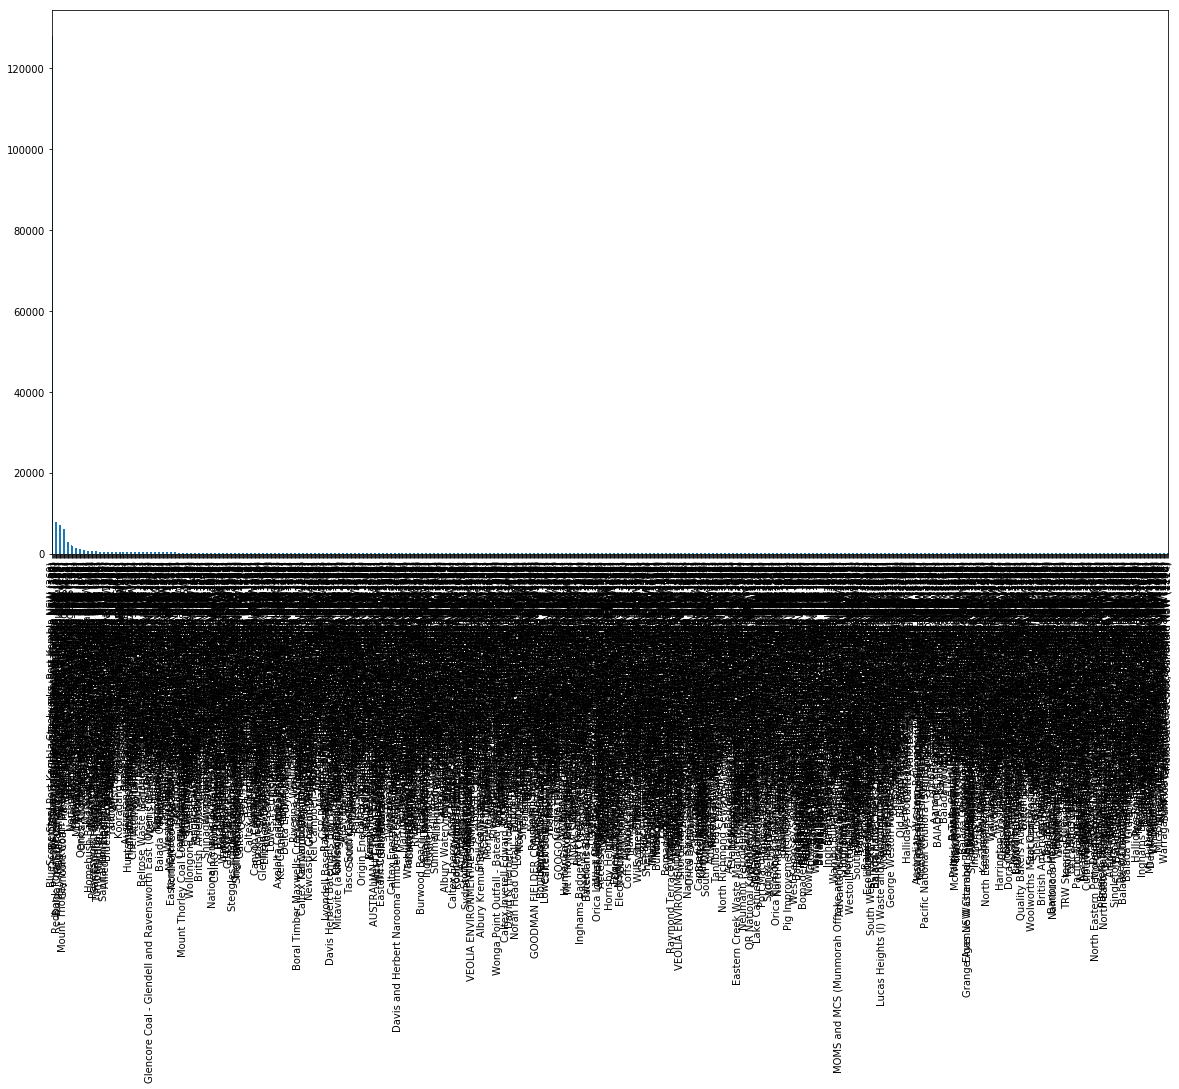

In [17]:
col = []

graph = []

graph_seires = pd.Series

for num in cat_dex:
    col.append(nsw_data.columns[num])

for name in col:
    print("---" ,name.upper(),"---")
    graph.append(nsw_data[name].value_counts())

# for col in graph:
#     col.plot(kind = "bar")

for i in range(len(graph)):
    graph[i].plot(kind = "bar")

# graph[2].plot(kind = "bar")

# df["column_name"].value_counts().plot(kind="bar")

['report_id', 'facility_id', 'jurisdiction_facility_id', 'primary_anzsic_class_code', 'substance_id', 'substance_sort_order', 'air_point_emission_kg', 'air_fugitive_emission_kg', 'air_fugitive_eet', 'air_total_emission_kg', 'water_emission_kg', 'water_eet', 'land_emission_kg', 'land_eet', 'postcode', 'latitude', 'longitude']
report_id


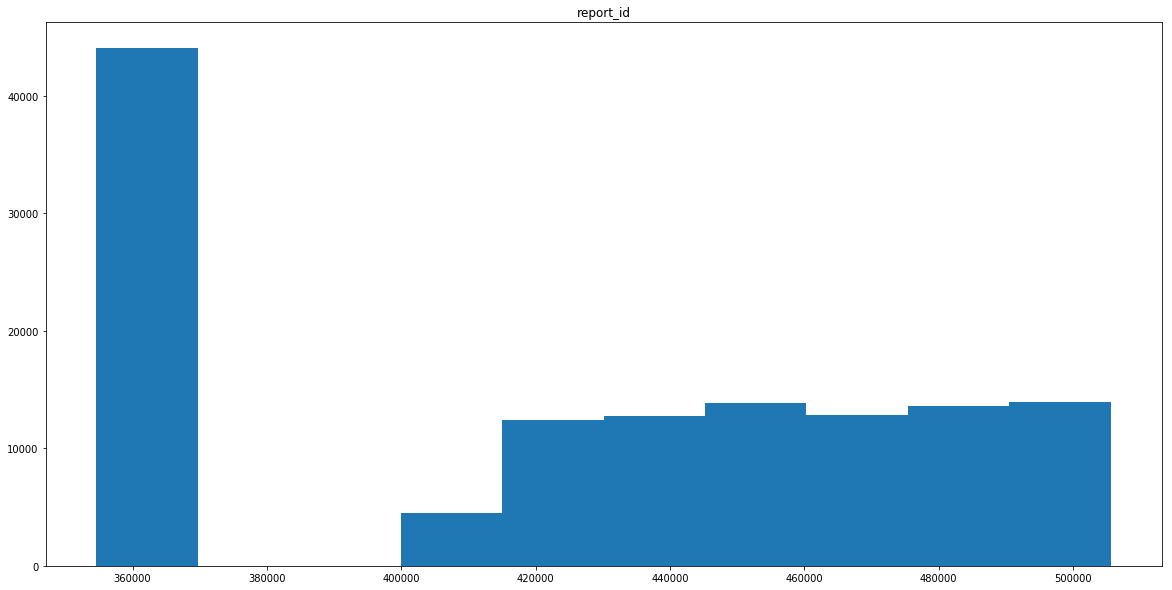

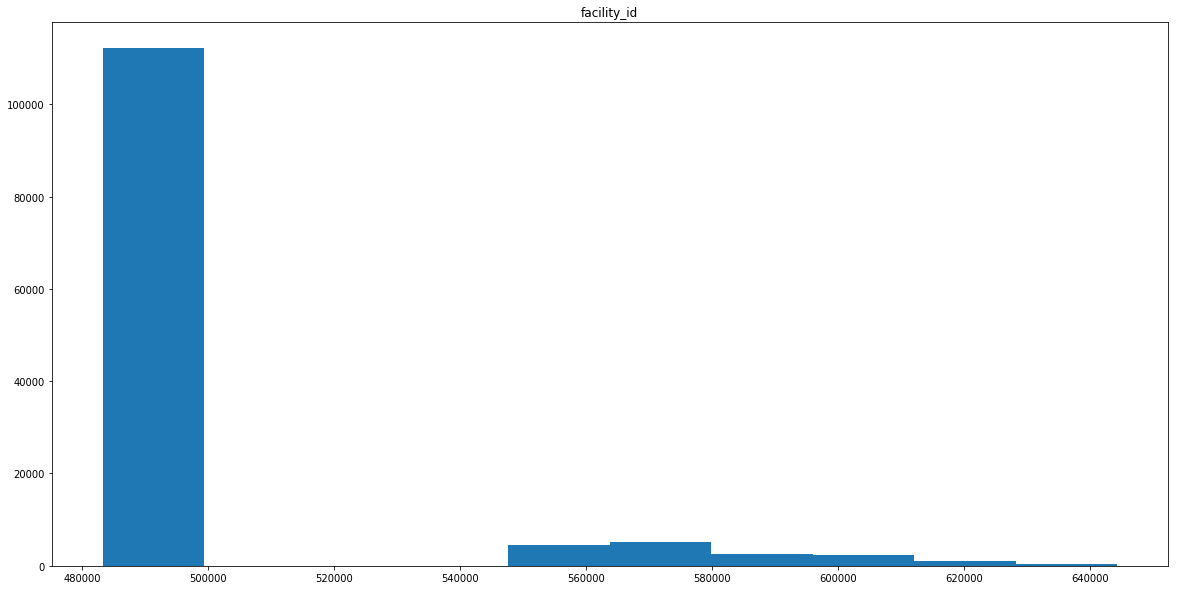

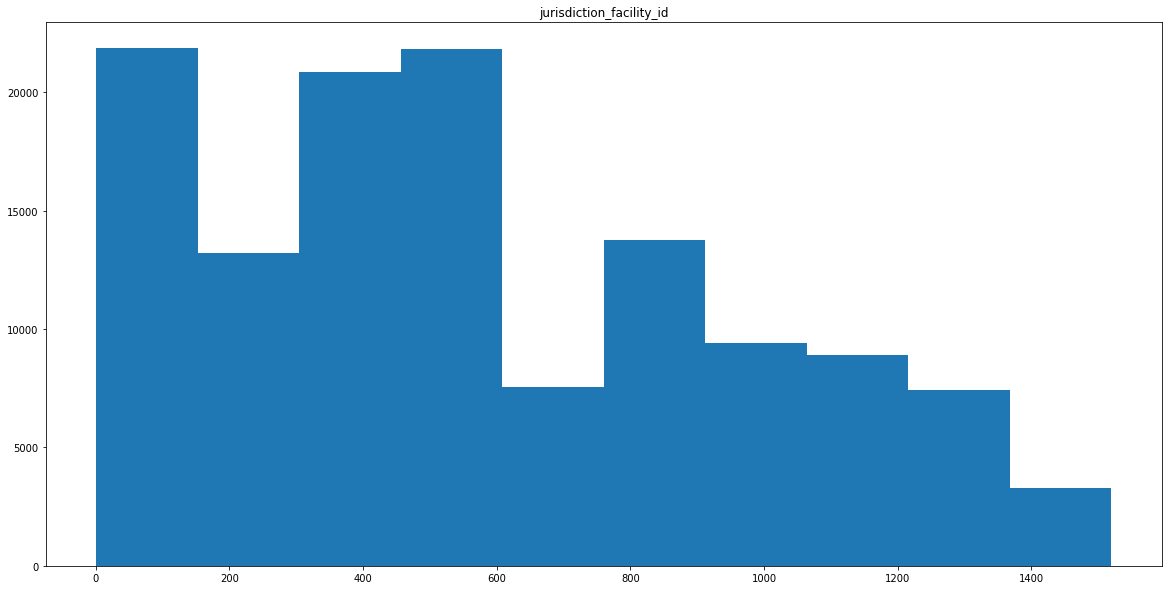

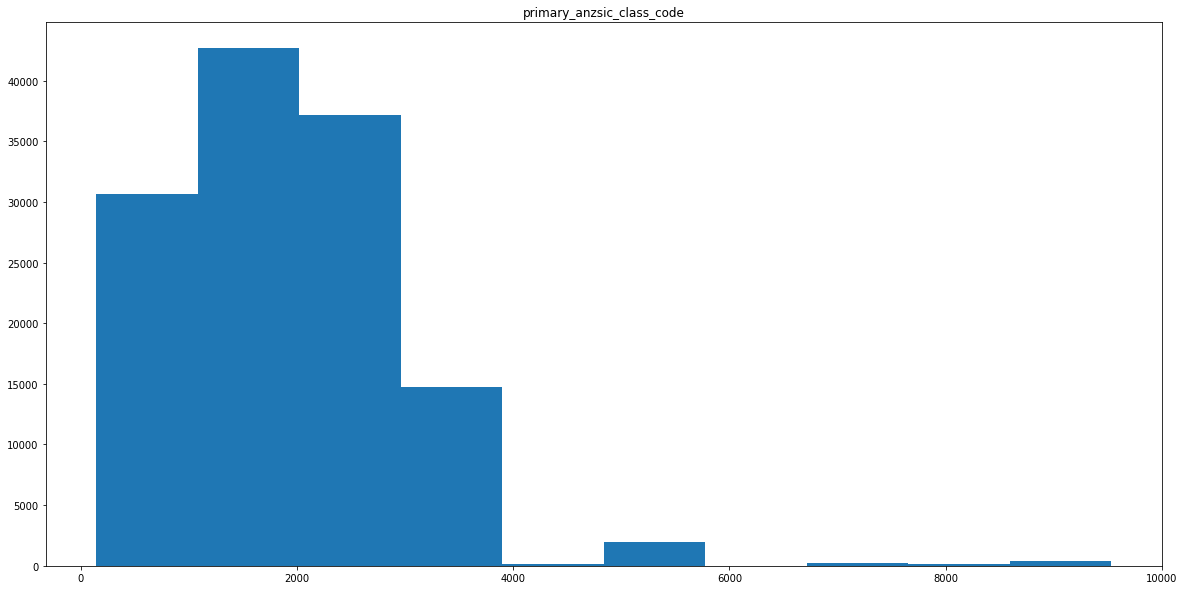

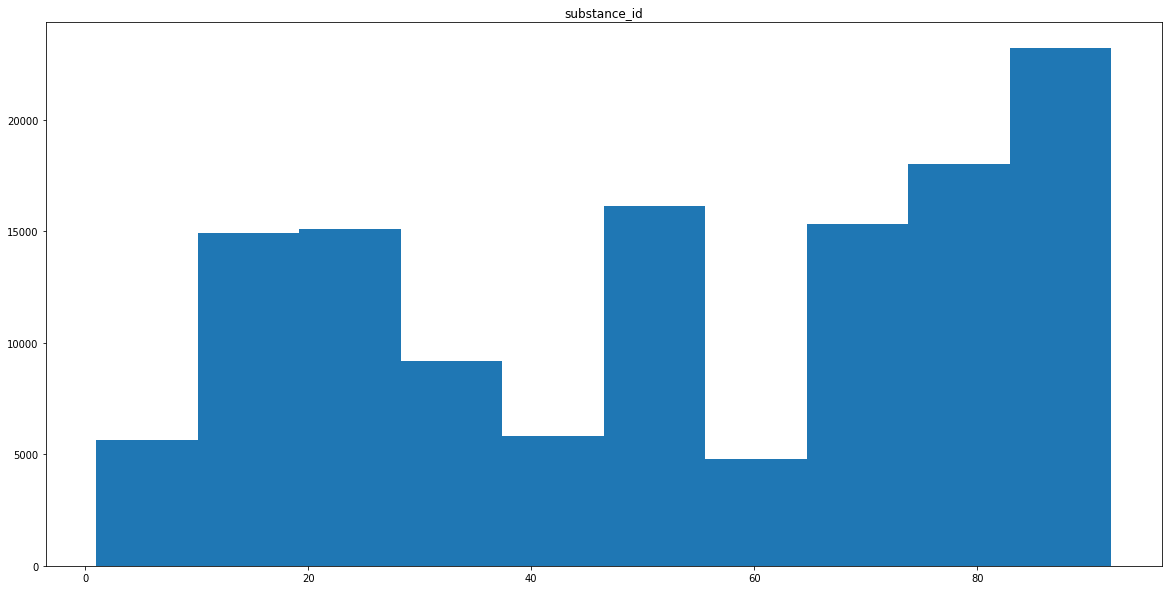

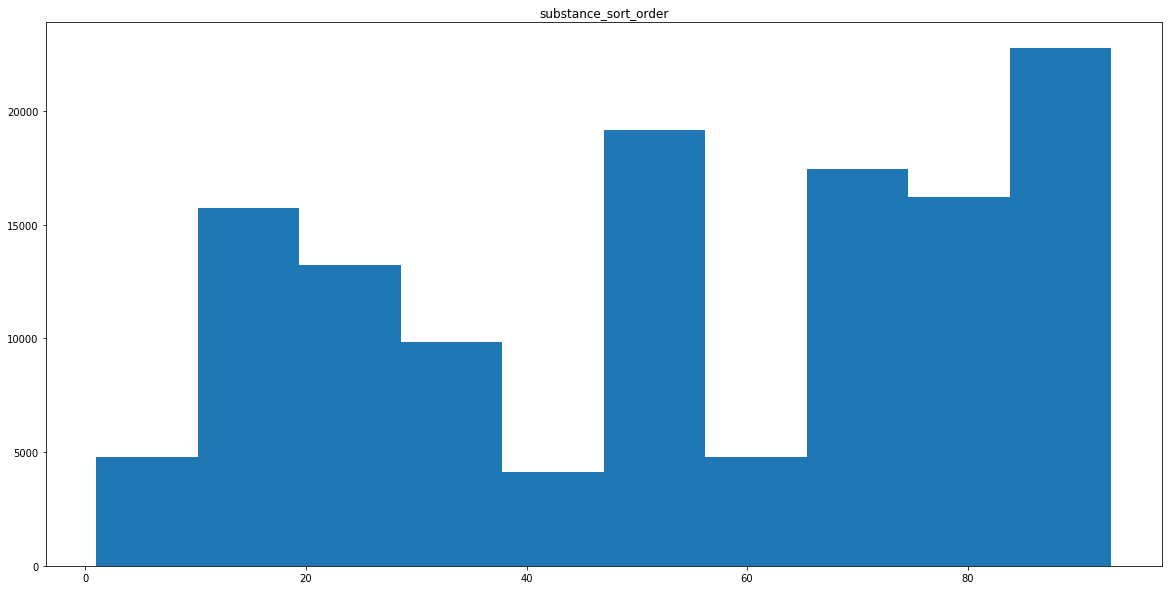

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


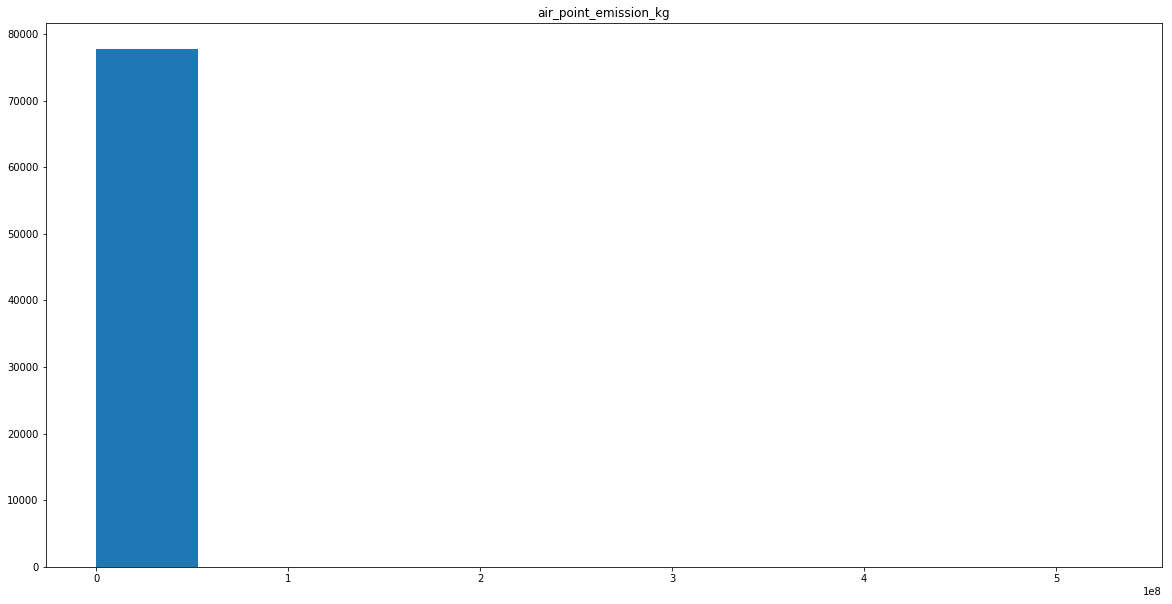

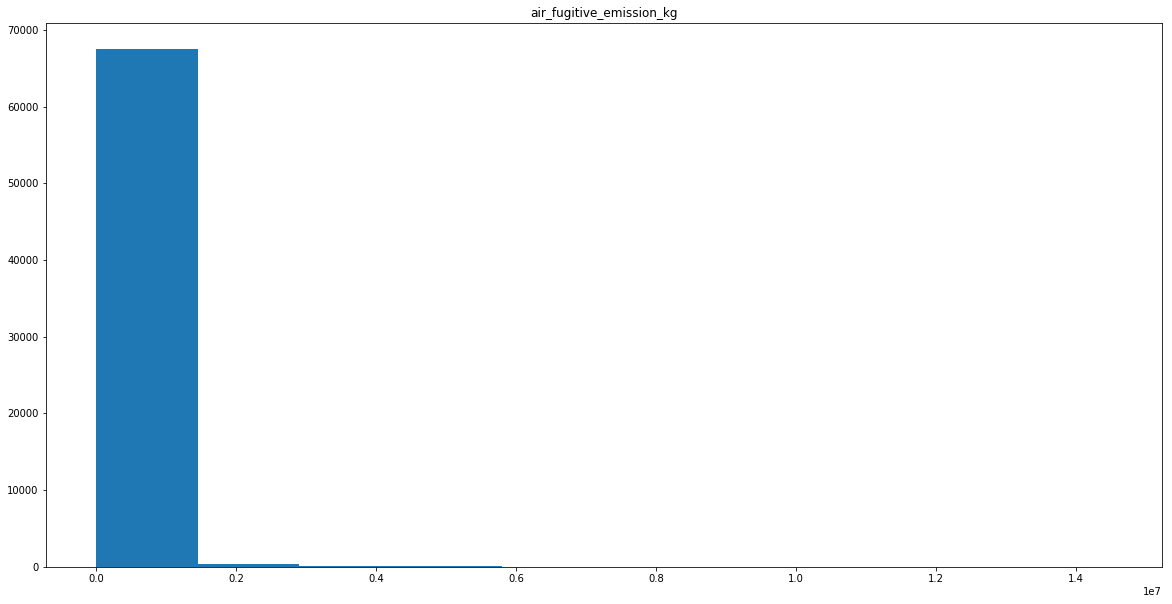

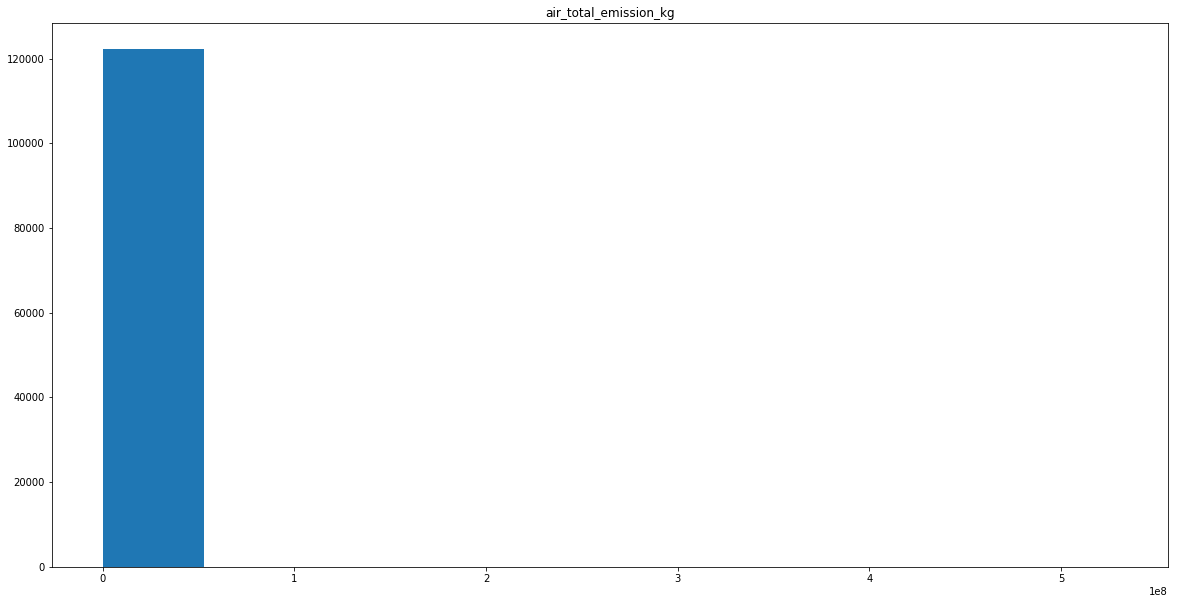

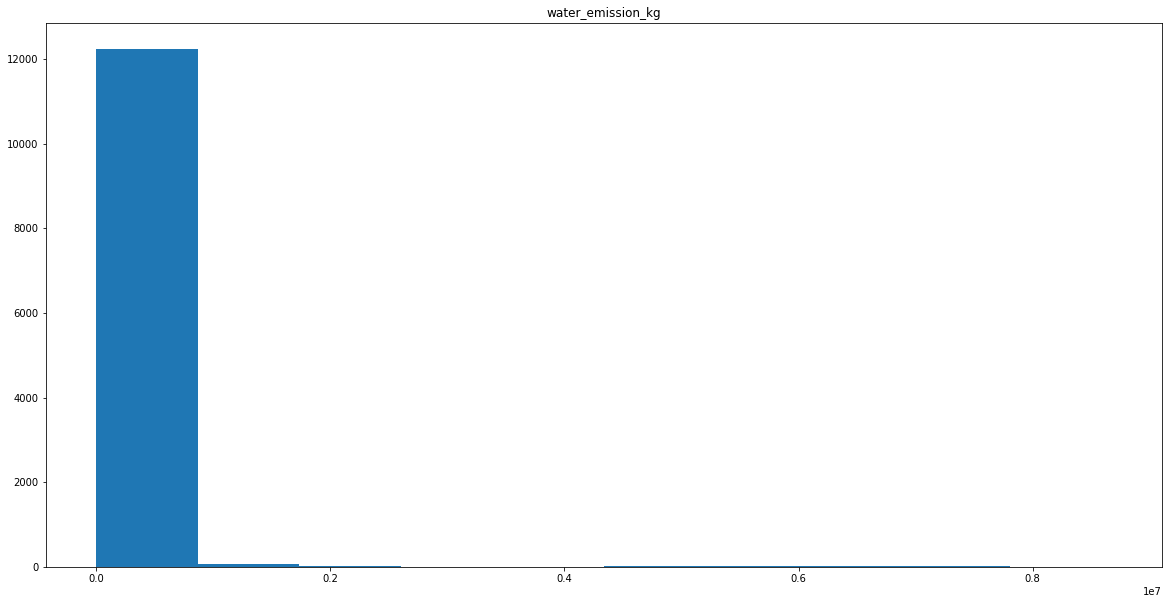

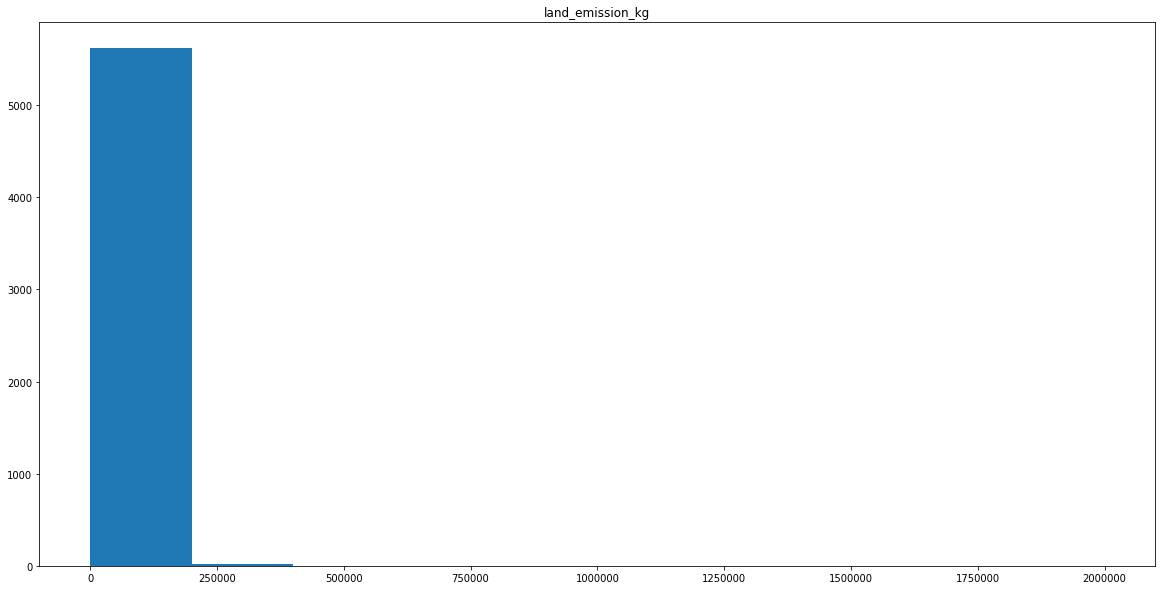

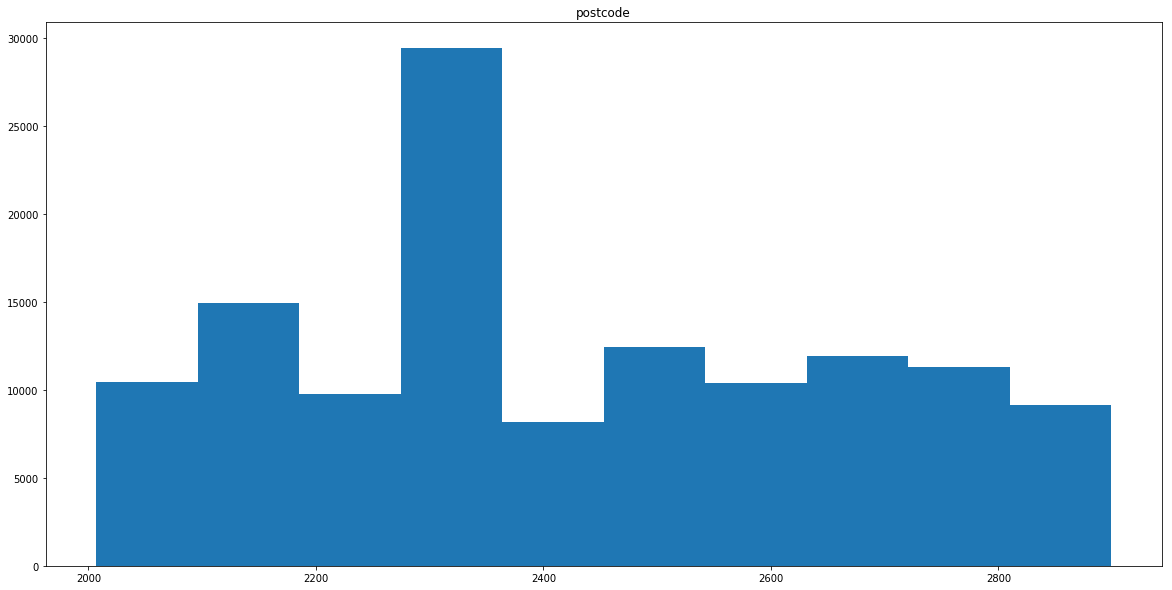

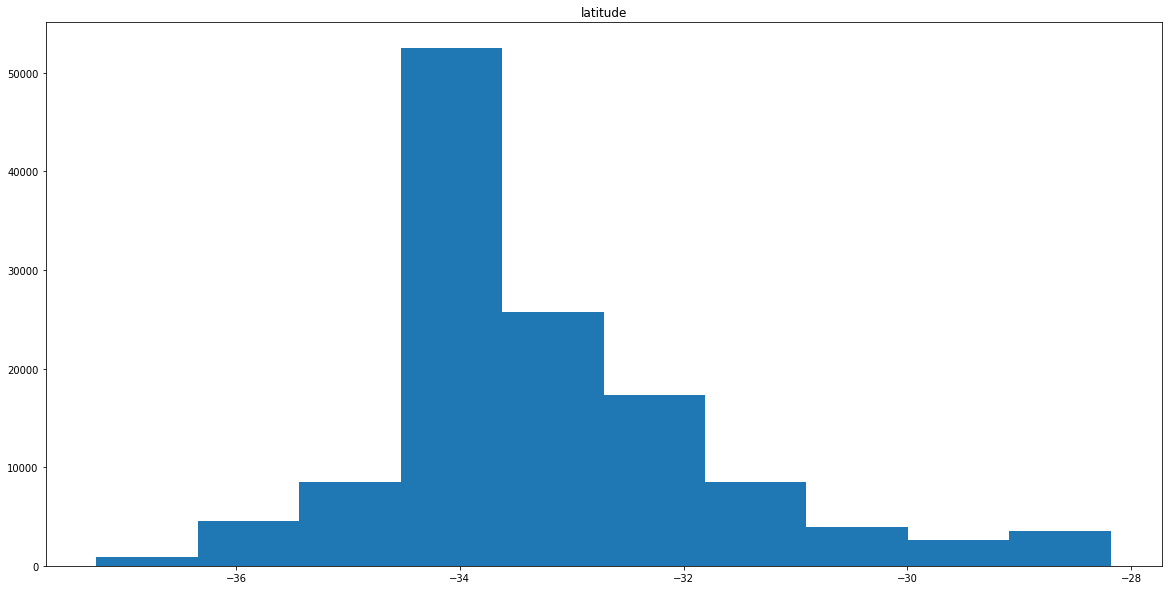

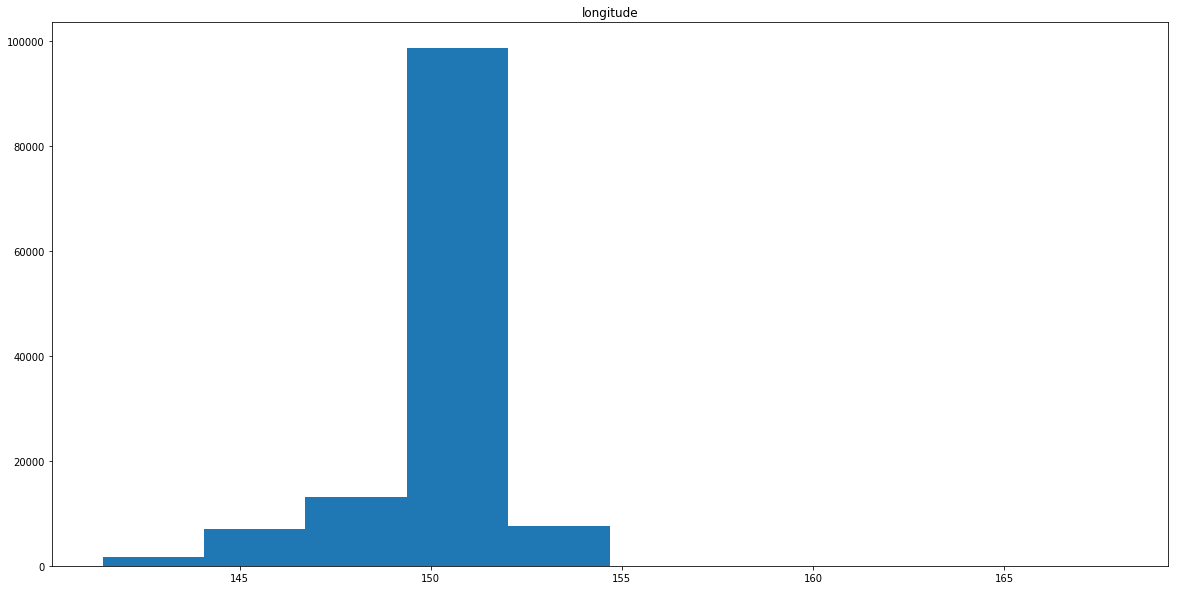

In [18]:
con_col = []

sml_con = con_col[1:3]



for num in con_dex:
    con_col.append(nsw_data.columns[num])

print(con_col)
nsw_data.columns[2]

test = con_col[0]

sml_con = con_col[1:3]

print(test)
for name in con_col:
    try:
        plt.hist(nsw_data[name])
        plt.title(name)
        plt.show()
    except:
        pass



# df["column_name"].hist()

## Looking at Continous Data 

In [19]:
print(str("---CONTINIOUS---\n"))
for num in con_dex:
    print(str(nsw_data.columns[num]).upper(),"(CN-{})".format(num),"\n" ,row_one[num],"\n")

---CONTINIOUS---

REPORT_ID (CN-0) 
 499174 

FACILITY_ID (CN-2) 
 494660 

JURISDICTION_FACILITY_ID (CN-4) 
 836 

PRIMARY_ANZSIC_CLASS_CODE (CN-7) 
 1111 

SUBSTANCE_ID (CN-9) 
 11 

SUBSTANCE_SORT_ORDER (CN-10) 
 12 

AIR_POINT_EMISSION_KG (CN-12) 
 0.0260985992919922 

AIR_FUGITIVE_EMISSION_KG (CN-14) 
 nan 

AIR_FUGITIVE_EET (CN-15) 
 nan 

AIR_TOTAL_EMISSION_KG (CN-16) 
 0.0260985992919922 

WATER_EMISSION_KG (CN-17) 
 nan 

WATER_EET (CN-18) 
 nan 

LAND_EMISSION_KG (CN-19) 
 nan 

LAND_EET (CN-20) 
 nan 

POSTCODE (CN-23) 
 2765 

LATITUDE (CN-24) 
 -33.66814 

LONGITUDE (CN-25) 
 150.900607 



A lot of the information is repeated 
eg the code of a substabce emited is the same as the name of a substance 

- Important Information gained 
    - Longitude
    - Latitude



## Max | Min | Mean | Median | Mode

In [20]:
# for name in con_col:
#     print("---", name, "---")
#     nsw_data[name].max()

for name in con_col:
    vals = nsw_data[name]
    try:
        maxv = vals.max()
        minv = vals.min()
        meav = vals.mean()
        midv = vals.median()
        modv = vals.mode()
        print("---",name.upper(),"---",
              "\n MAX -->",    int(maxv),  "\n ",
              "\n MIN -->",    int(minv),  "\n ",
              "\n MEAN -->",   int(meav),  "\n ",
              "\n MEDIAN -->", int(midv),  "\n ",
              "\n MODE -->",   int(modv),  "\n ",
              "\n ",
              "\n ")

    except:
        pass
    

--- FACILITY_ID --- 
 MAX --> 644280 
  
 MIN --> 483246 
  
 MEAN --> 500550 
  
 MEDIAN --> 489946 
  
 MODE --> 487830 
  
  
 
--- JURISDICTION_FACILITY_ID --- 
 MAX --> 1519 
  
 MIN --> 1 
  
 MEAN --> 583 
  
 MEDIAN --> 505 
  
 MODE --> 360 
  
  
 
--- PRIMARY_ANZSIC_CLASS_CODE --- 
 MAX --> 9531 
  
 MIN --> 143 
  
 MEAN --> 1851 
  
 MEDIAN --> 1812 
  
 MODE --> 600 
  
  
 
--- SUBSTANCE_ID --- 
 MAX --> 92 
  
 MIN --> 1 
  
 MEAN --> 52 
  
 MEDIAN --> 55 
  
 MODE --> 85 
  
  
 
--- SUBSTANCE_SORT_ORDER --- 
 MAX --> 93 
  
 MIN --> 1 
  
 MEAN --> 53 
  
 MEDIAN --> 56 
  
 MODE --> 88 
  
  
 
--- AIR_POINT_EMISSION_KG --- 
 MAX --> 528586400 
  
 MIN --> 0 
  
 MEAN --> 204778 
  
 MEDIAN --> 24 
  
 MODE --> 0 
  
  
 
--- AIR_FUGITIVE_EMISSION_KG --- 
 MAX --> 14500652 
  
 MIN --> 0 
  
 MEAN --> 41819 
  
 MEDIAN --> 40 
  
 MODE --> 1 
  
  
 
--- AIR_TOTAL_EMISSION_KG --- 
 MAX --> 529289600 
  
 MIN --> 0 
  
 MEAN --> 153880 
  
 MEDIAN --> 31 
  
 MODE --

# Subtance Reports 2018 vs 1998

Different types of substance recorded 2018/2019 
 79
Different types of substance recorded 1999/1998 
 53
Different types of substance recorded increased by 
 26


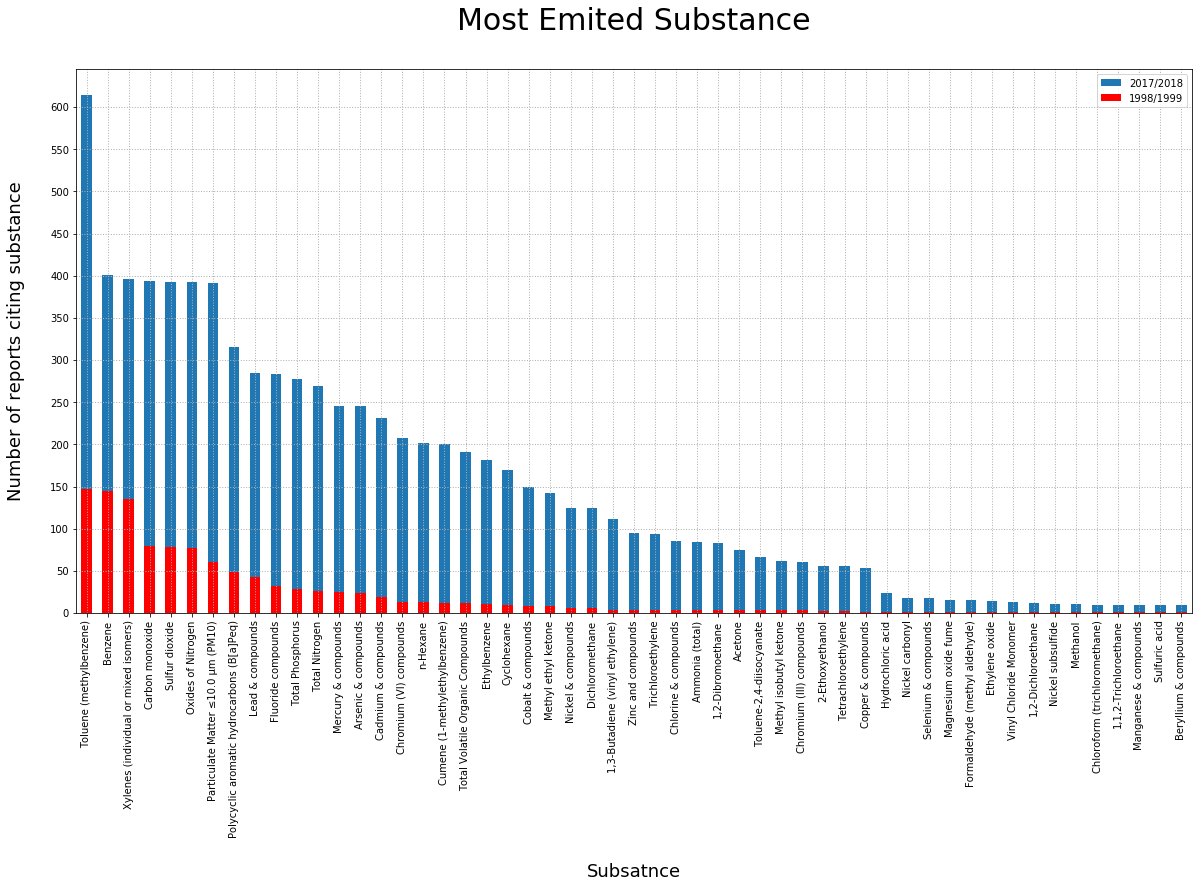

In [21]:
test_val = "1998/1999"

yr_98to99 = nsw_data.loc[nsw_data['report_year'] == test_val]

sub_98to99 = yr_98to99["substance_name"].value_counts()




test_val2 = "2017/2018"

yr_17to18 = nsw_data.loc[nsw_data['report_year'] == test_val2]

sub_17to18 = yr_17to18["substance_name"].value_counts()


base_num = len(sub_17to18)
# base_num = int(base_num)
print("Different types of substance recorded 2018/2019","\n",base_num)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Most Emited Substance" "\n", fontsize = 30)
plt.ylabel("Number of reports citing substance" "\n", fontsize = 18)
plt.xlabel("\n" "Subsatnce", fontsize = 18)

sub_17to18[sub_17to18 > 0].plot(kind = "bar")
# plt.stem(sub_98to99[sub_98to99 > 0])
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)





base_num = len(sub_98to99)
# base_num = int(base_num)
print("Different types of substance recorded 1999/1998","\n",base_num)


increased = int(len(sub_17to18)) - int(len(sub_98to99))

print("Different types of substance recorded increased by","\n",increased)


plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Most Emited Substance" "\n", fontsize = 30)
plt.ylabel("Number of reports citing substance" "\n", fontsize = 18)
plt.xlabel("\n" "Subsatnce", fontsize = 18)

sub_98to99[sub_98to99 > 0].plot(kind = "bar", facecolor = 'red')
# plt.stem(sub_98to99[sub_98to99 > 0])
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)

plt.legend(["2017/2018","1998/1999"])





## Which year had the most reported cases ?

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <a list of 20 Text xticklabel objects>)

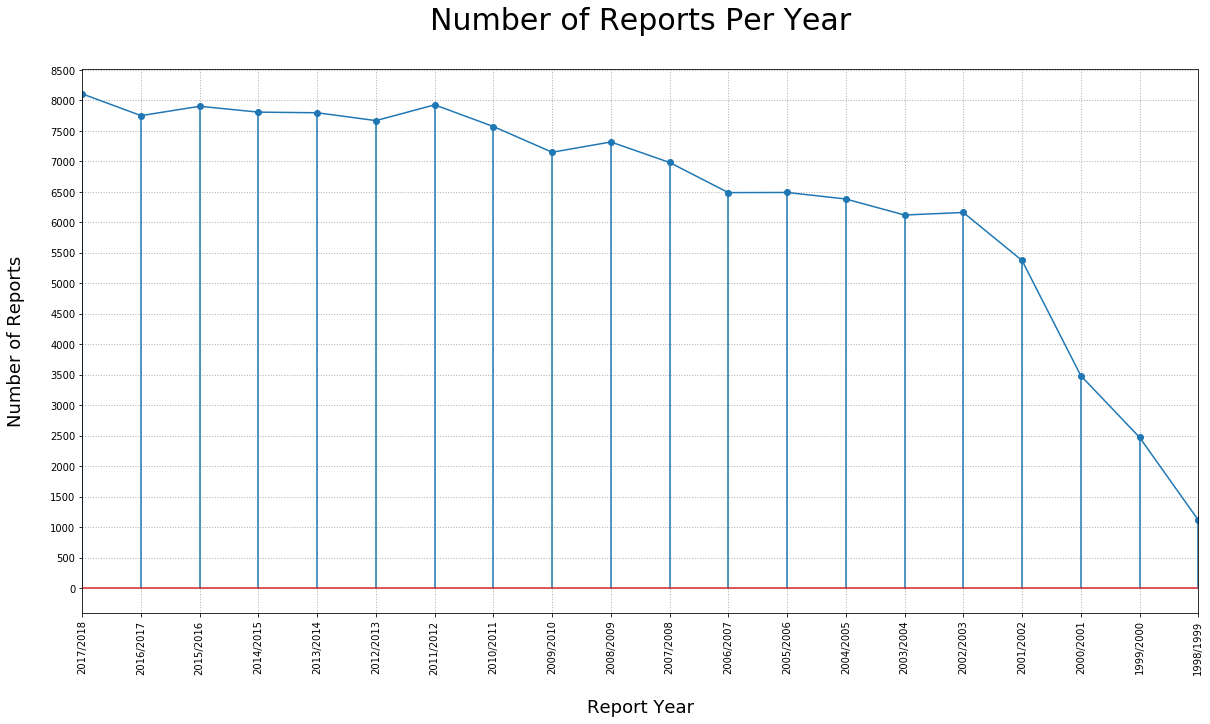

In [22]:
year = nsw_data["report_year"].value_counts(ascending = False)
year.sort_index(inplace = True, ascending = False)
# print(year)
base_num = len(year)
# base_num = int(base_num)
# print(base_num)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Number of Reports Per Year" "\n", fontsize = 30)
plt.ylabel("Number of Reports" "\n", fontsize = 18)
plt.xlabel("\n" "Report Year", fontsize = 18)

year.plot()
plt.stem(year)
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)


## There have been ups and downs in the amount of reports but the general trend is an increase in the number of reports per year 

## Which substance is the most emited over all the years ?

87


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
        78., 79., 80., 81., 82., 83., 84., 85., 86.]),
 <a list of 87 Text xticklabel objects>)

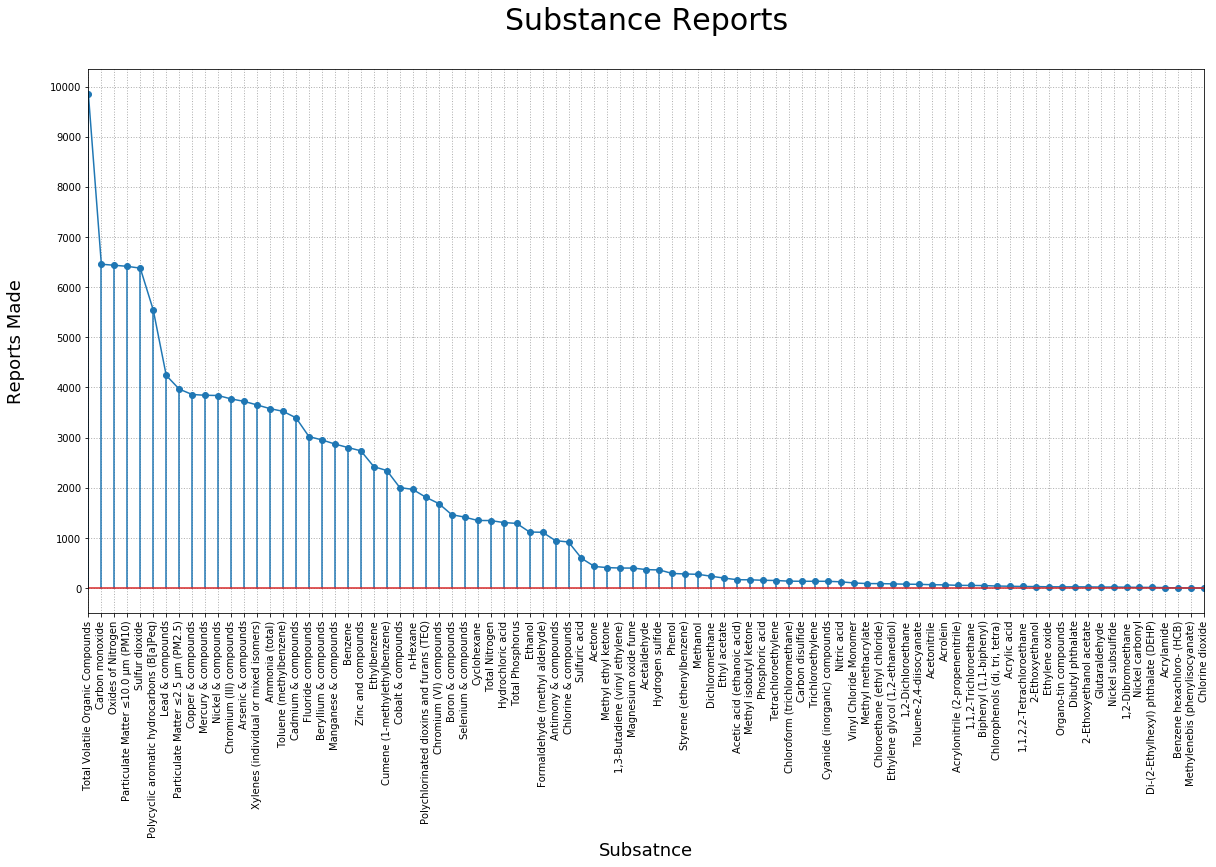

In [23]:
collated_substance = nsw_data["substance_name"].value_counts()

base_num = len(collated_substance)
# base_num = int(base_num)
print(base_num)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Substance Reports" "\n", fontsize = 30)
plt.ylabel("Reports Made" "\n", fontsize = 18)
plt.xlabel("Subsatnce", fontsize = 18)

collated_substance[collated_substance > 0].plot()
plt.stem(collated_substance[collated_substance > 0])
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)

# Top 10 Most Reported Substances

In [24]:
top_ten_subs = collated_substance[:10]

print(top_ten_subs)

Total Volatile Organic Compounds              9854
Carbon monoxide                               6458
Oxides of Nitrogen                            6437
Particulate Matter ≤10.0 µm (PM10)            6416
Sulfur dioxide                                6379
Polycyclic aromatic hydrocarbons (B[a]Peq)    5545
Lead & compounds                              4241
Particulate Matter ≤2.5 µm (PM2.5)            3968
Copper & compounds                            3860
Mercury & compounds                           3845
Name: substance_name, dtype: int64


## Substances and thier side effects ? 
npi.gov.au

Total Volatile Organic Compounds - 9854

    -"TVOC is a grouping of a wide range of organic chemical compounds to simplify reporting when these are present in ambient air or emissions" - npi.gov.au
    
Carbon monoxide

    - Greenhouse gasses
    - Climate change / Global Warming
    - Effect fertilitity in animals and humans 
    
    
Oxides of Nitrogen

    - Effects farming + ground water 
    - Contributes to fog 
    
Particulate Matter ≤10.0 µm (PM10)

     -Dust, particulate matter, inhalable particles, respirable particles, smoke, mist
     
Sulfur dioxide

     -Effects farming 
     
Polycyclic aromatic hydrocarbons (B[a]Peq)

    -Can cause cancer
    -Longterm negative effects on flora and fauna
    
Lead & compounds

    -High levels can damanage brain and kidneys and can casue death    
    
Particulate Matter ≤2.5 µm (PM2.5)

    -Can cause allergic reactions and cancer
    
Copper & compounds

    -General irritation
    -Kidney + liver issues + death
    -Effects the akalinity of water
    
    
Mercury & compounds

    -Effects the nervous system and the brain negatively 
    -Can casue permanent damage to skin and eyes
    -Create chronic toxicity in aquatic life

10


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

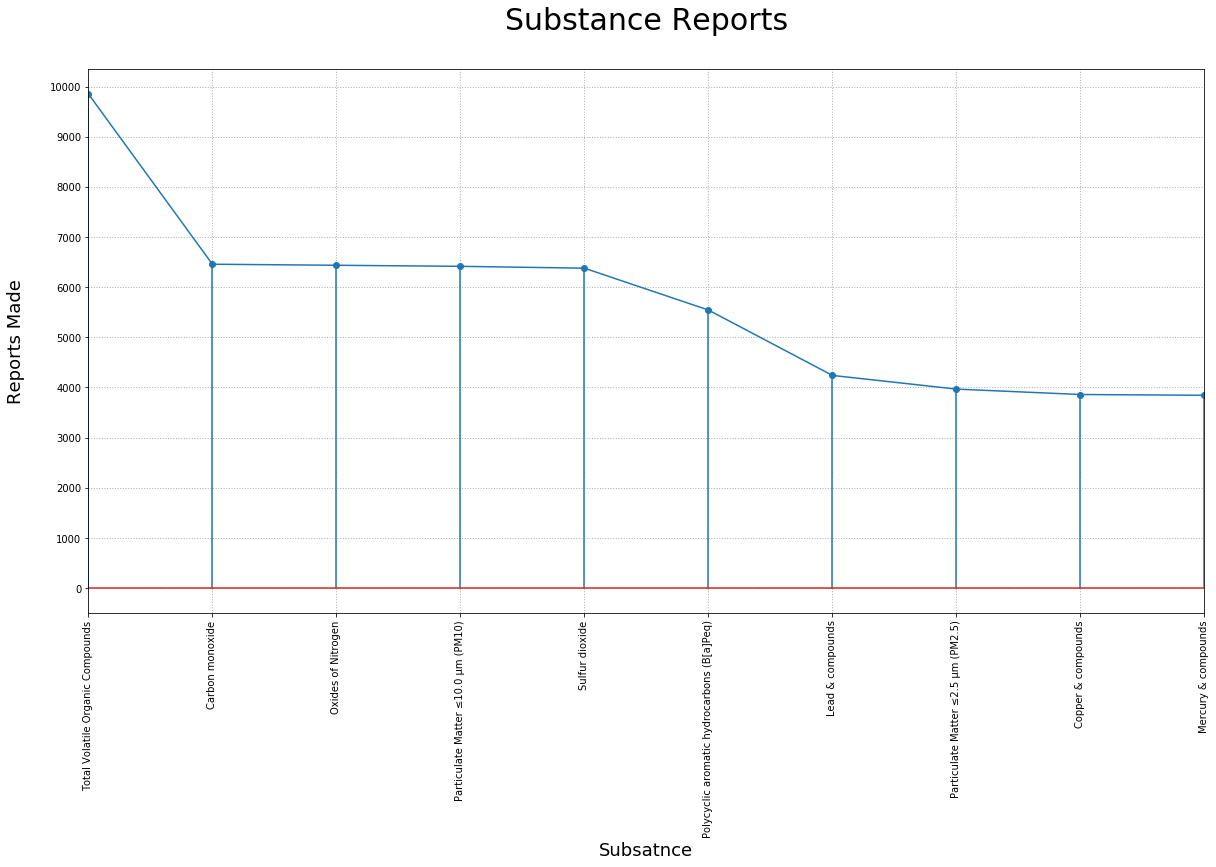

In [25]:


base_num = len(top_ten_subs)
# base_num = int(base_num)
print(base_num)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Substance Reports" "\n", fontsize = 30)
plt.ylabel("Reports Made" "\n", fontsize = 18)
plt.xlabel("Subsatnce", fontsize = 18)

top_ten_subs[top_ten_subs > 0].plot()
plt.stem(top_ten_subs[top_ten_subs > 0])
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)

# Industries Emitting substances

In [26]:
industry = nsw_data['primary_anzsic_class_name'].value_counts()
industry

Coal Mining                                                             18618
Petroleum Product Wholesaling                                           14659
Sewerage and Drainage Services                                           5782
Fossil Fuel Electricity Generation                                       4679
Waste Treatment and Disposal Services                                    4128
Meat Processing                                                          4053
Clay Brick Manufacturing                                                 3325
Iron Smelting and Steel Manufacturing                                    2621
Basic Organic Chemical Manufacturing                                     2571
Other Petroleum and Coal Product Manufacturing                           2406
Other Food Product Manufacturing n.e.c.                                  2303
Reconstituted Wood Product Manufacturing                                 2278
Prepared Animal and Bird Feed Manufacturing                     

121


(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.]),
 <a list of 121 Text xticklabel objects>)

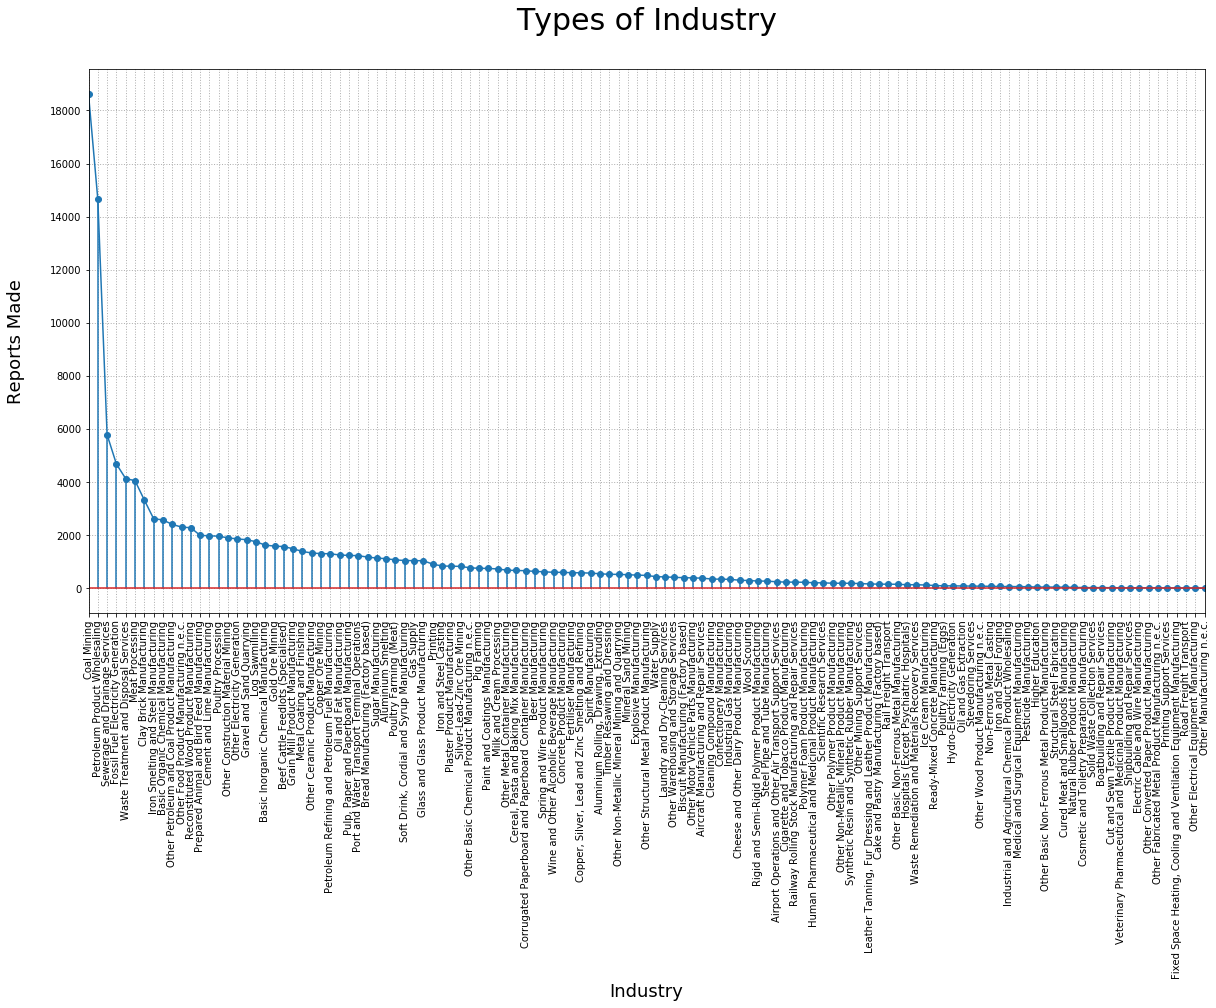

In [27]:
base_num = len(industry)
# base_num = int(base_num)
print(base_num)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Types of Industry" "\n", fontsize = 30)
plt.ylabel("Reports Made" "\n", fontsize = 18)
plt.xlabel("Industry", fontsize = 18)

industry[industry > 0].plot()
plt.stem(industry[industry > 0])
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)

# To many to make sense of - lets look at the top 50 

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]),
 <a list of 50 Text xticklabel objects>)

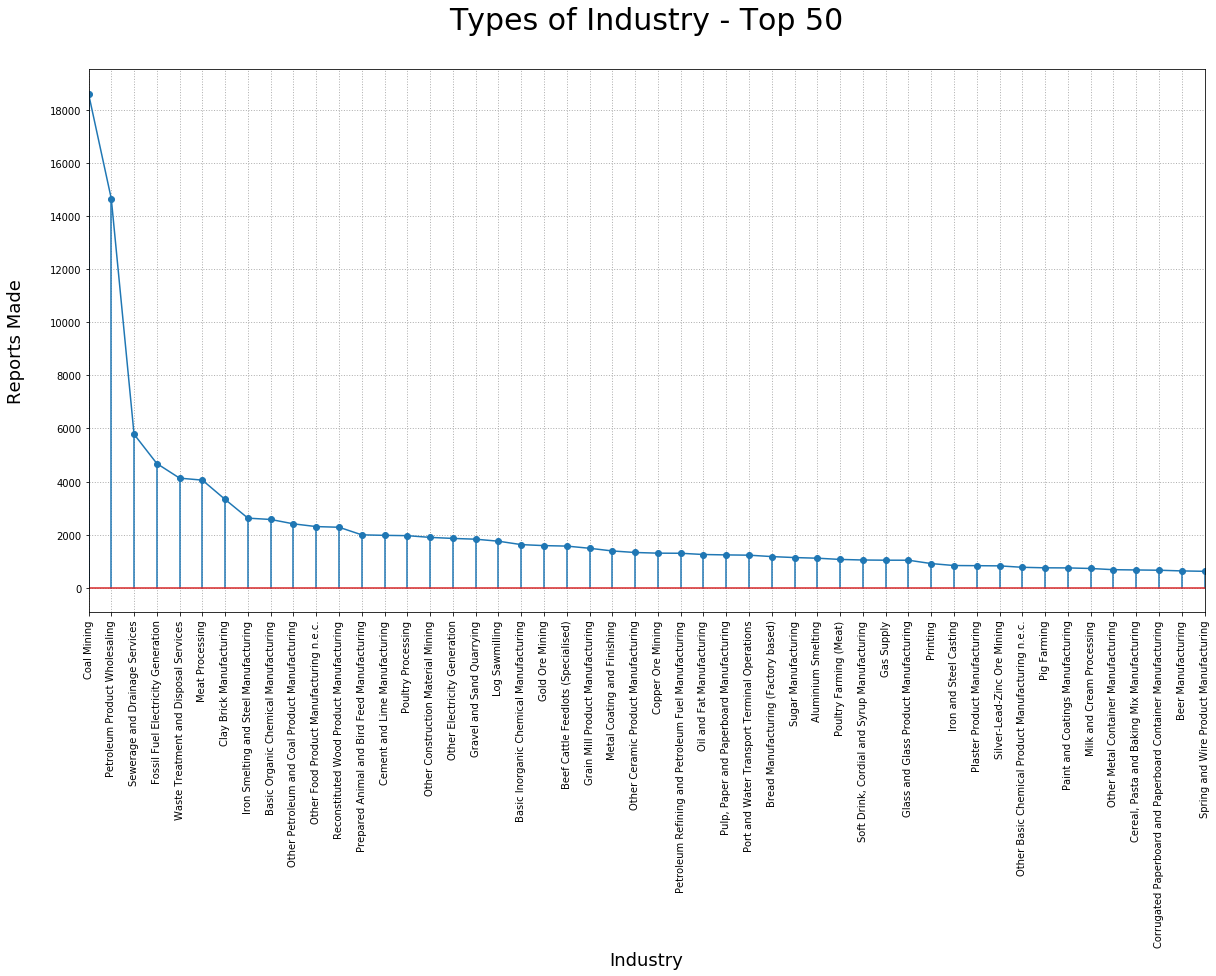

In [28]:
indust_top_50 = industry[:50]


base_num = len(indust_top_50)
# base_num = int(base_num)
# print(indust_top_50)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Types of Industry - Top 50" "\n", fontsize = 30)
plt.ylabel("Reports Made" "\n", fontsize = 18)
plt.xlabel("Industry", fontsize = 18)

indust_top_50[indust_top_50 > 0].plot()
plt.stem(indust_top_50[indust_top_50 > 0])
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)

# Still a few too many  - lets look at the top 20

Coal Mining                                       18618
Petroleum Product Wholesaling                     14659
Sewerage and Drainage Services                     5782
Fossil Fuel Electricity Generation                 4679
Waste Treatment and Disposal Services              4128
Meat Processing                                    4053
Clay Brick Manufacturing                           3325
Iron Smelting and Steel Manufacturing              2621
Basic Organic Chemical Manufacturing               2571
Other Petroleum and Coal Product Manufacturing     2406
Other Food Product Manufacturing n.e.c.            2303
Reconstituted Wood Product Manufacturing           2278
Prepared Animal and Bird Feed Manufacturing        1992
Cement and Lime Manufacturing                      1973
Poultry Processing                                 1961
Other Construction Material Mining                 1896
Other Electricity Generation                       1857
Gravel and Sand Quarrying                       

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <a list of 20 Text xticklabel objects>)

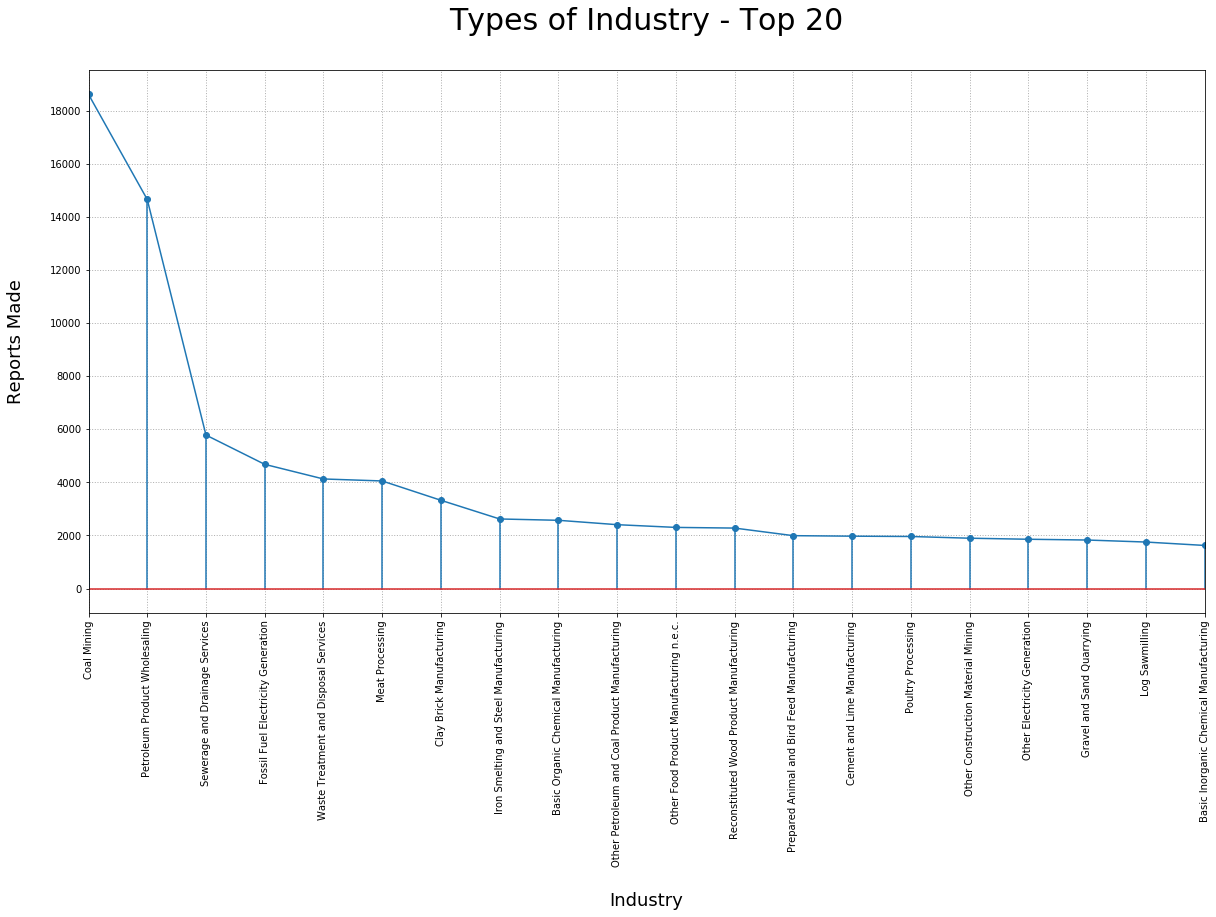

In [29]:
indust_top_20 = industry[:20]


base_num = len(indust_top_20)
# base_num = int(base_num)
print(indust_top_20)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Types of Industry - Top 20" "\n", fontsize = 30)
plt.ylabel("Reports Made" "\n", fontsize = 18)
plt.xlabel("\n""Industry", fontsize = 18)

indust_top_20[indust_top_20 > 0].plot()
plt.stem(indust_top_20[indust_top_20 > 0])
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)

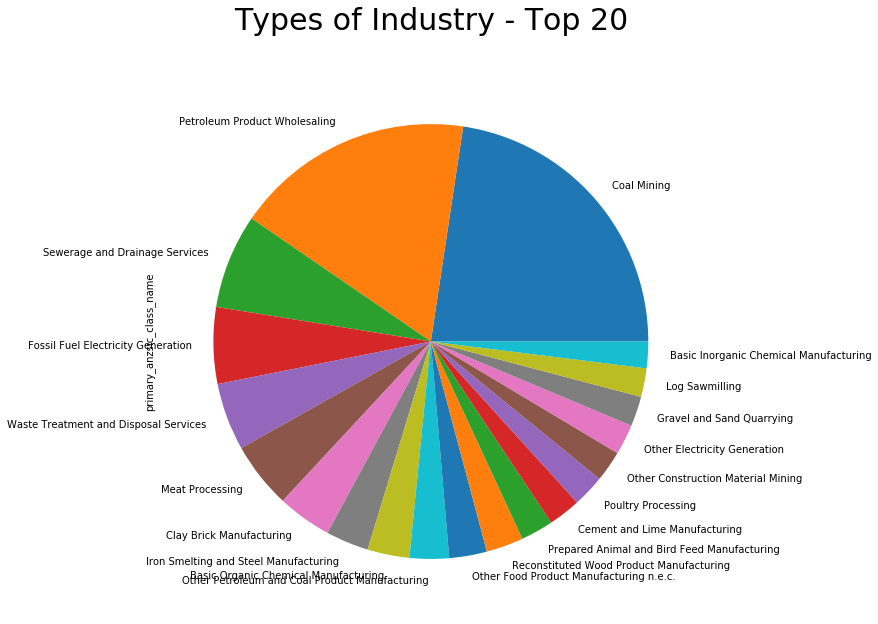

In [30]:
plt.title("Types of Industry - Top 20" "\n", fontsize = 30)
indust_top_20.plot(kind = 'pie')

# Top offenders 

- Coal Mining
- Patroleum
- Waste Treatment
- Food + Meat processing
- Construction materials 

# Bottom 20 ?
## Higher Education ?

Pesticide Manufacturing                                                 54
Higher Education                                                        45
Other Basic Non-Ferrous Metal Product Manufacturing                     44
Structural Steel Fabricating                                            42
Cured Meat and Smallgoods Manufacturing                                 40
Natural Rubber Product Manufacturing                                    33
Cosmetic and Toiletry Preparation Manufacturing                         23
Solid Waste Collection Services                                         22
Boatbuilding and Repair Services                                        21
Cut and Sewn Textile Product Manufacturing                              20
Veterinary Pharmaceutical and Medicinal Product Manufacturing           14
Shipbuilding and Repair Services                                        14
Electric Cable and Wire Manufacturing                                   13
Other Converted Paper Pro

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <a list of 20 Text xticklabel objects>)

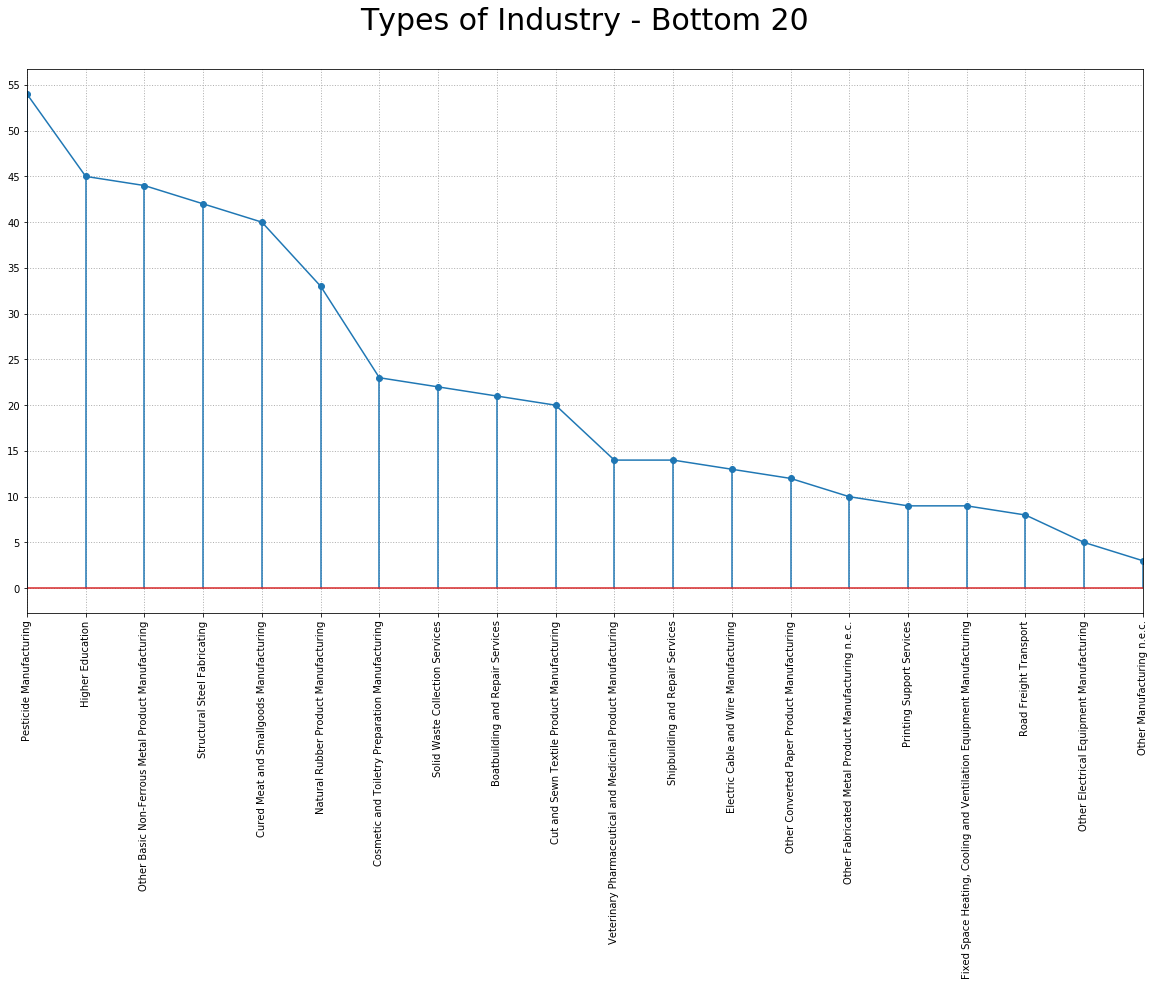

In [31]:
indust_bot_20 = industry.tail(20)



base_num = len(indust_bot_20)
# base_num = int(base_num)
print(indust_bot_20)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Types of Industry - Bottom 20" "\n", fontsize = 30)
# plt.ylabel("Reports Made" "\n", fontsize = 18)
# plt.xlabel("\n""Industry", fontsize = 18)

indust_bot_20[indust_bot_20 > 0].plot()
plt.stem(indust_bot_20[indust_bot_20 > 0])
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)

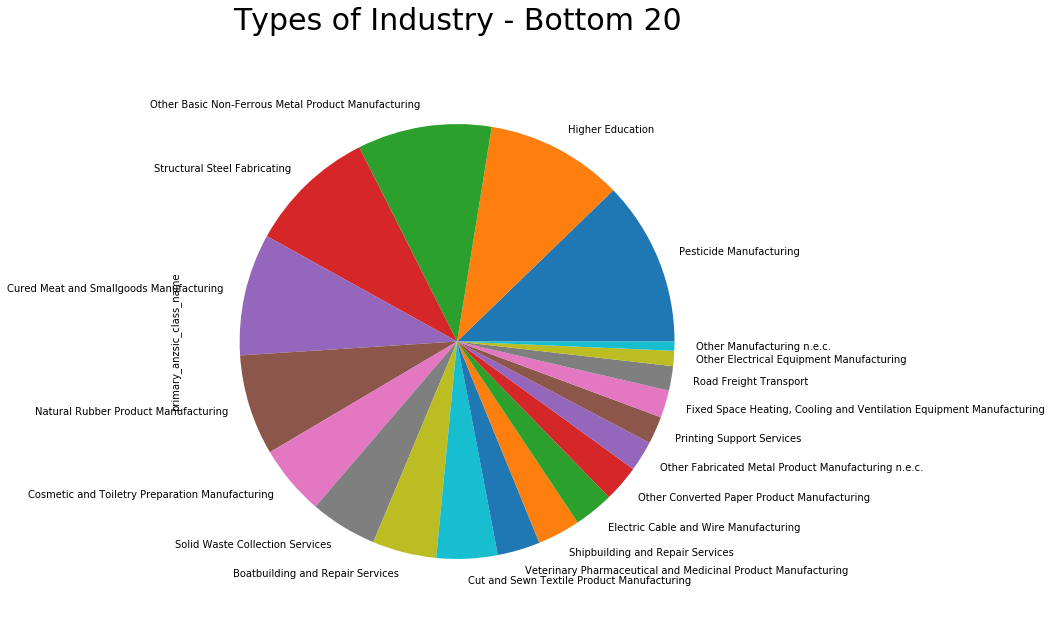

In [32]:
plt.title("Types of Industry - Bottom 20" "\n", fontsize = 30)
indust_bot_20.plot(kind = 'pie')


## Which Higher Education Institute ?

In [80]:
higher_edu = nsw_data[nsw_data['primary_anzsic_class_name'] == "Higher Education"]
higher_edu

report_id report_year  facility_id jurisdiction_code  \
7416      503622   2017/2018       622496               NSW   
7417      503622   2017/2018       622496               NSW   
7418      503622   2017/2018       622496               NSW   
7419      503622   2017/2018       622496               NSW   
7420      503622   2017/2018       622496               NSW   
7421      503622   2017/2018       622496               NSW   
7422      503622   2017/2018       622496               NSW   
7423      503622   2017/2018       622496               NSW   
7424      503622   2017/2018       622496               NSW   
7425      503622   2017/2018       622496               NSW   
7426      503622   2017/2018       622496               NSW   
7427      503622   2017/2018       622496               NSW   
7428      503622   2017/2018       622496               NSW   
7429      503622   2017/2018       622496               NSW   
7430      503622   2017/2018       622496               NSW   
15228     491150   2016/2017       622496               NSW   
15229     491150   2016/2017       622496               NSW   
15230     491150   2016/2017       622496               NSW   
15231     491150   2016/2017       622496               NSW   
15232     491150   2016/2017       622496               NSW   
15233     491150   2016/2017       622496               NSW   
15234     491150   2016/2017       622496               NSW   
15235     491150   2016/2017       622496               NSW   
15236     491150   2016/2017       622496               NSW   
15237     491150   2016/2017       622496               NSW   
15238     491150   2016/2017       622496               NSW   
15239     491150   2016/2017       622496               NSW   
15240     491150   2016/2017       622496               NSW   
15241     491150   2016/2017       622496               NSW   
15242     491150   2016/2017       622496               NSW   
23098     483842   2015/2016       622496               NSW   
23099     483842   2015/2016       622496               NSW   
23100     483842   2015/2016       622496               NSW   
23101     483842   2015/2016       622496               NSW   
23102     483842   2015/2016       622496               NSW   
23103     483842   2015/2016       622496               NSW   
23104     483842   2015/2016       622496               NSW   
23105     483842   2015/2016       622496               NSW   
23106     483842   2015/2016       622496               NSW   
23107     483842   2015/2016       622496               NSW   
23108     483842   2015/2016       622496               NSW   
23109     483842   2015/2016       622496               NSW   
23110     483842   2015/2016       622496               NSW   
23111     483842   2015/2016       622496               NSW   
23112     483842   2015/2016       622496               NSW   

       jurisdiction_facility_id                     facility_name  \
7416                       1463    UNSW Sydney, Kensington Campus   
7417                       1463    UNSW Sydney, Kensington Campus   
7418                       1463    UNSW Sydney, Kensington Campus   
7419                       1463    UNSW Sydney, Kensington Campus   
7420                       1463    UNSW Sydney, Kensington Campus   
7421                       1463    UNSW Sydney, Kensington Campus   
7422                       1463    UNSW Sydney, Kensington Campus   
7423                       1463    UNSW Sydney, Kensington Campus   
7424                       1463    UNSW Sydney, Kensington Campus   
7425                       1463    UNSW Sydney, Kensington Campus   
7426                       1463    UNSW Sydney, Kensington Campus   
7427                       1463    UNSW Sydney, Kensington Campus   
7428                       1463    UNSW Sydney, Kensington Campus   
7429                       1463    UNSW Sydney, Kensington Campus   
7430                       1463    UNSW Sydney, Kensington Campus   
1522

## UNSW?

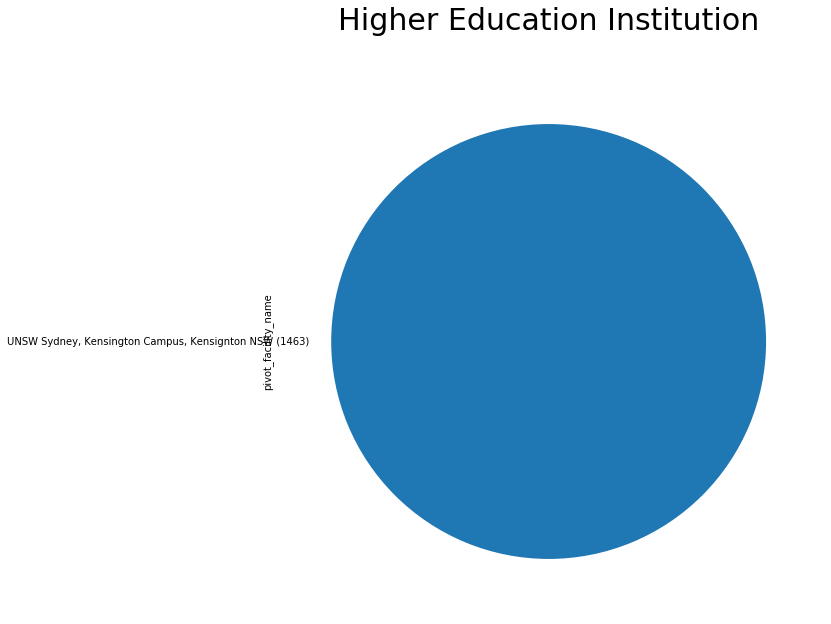

In [94]:
h_edu_name = higher_edu["pivot_facility_name"].value_counts()
plt.title("Higher Education Institution" "\n", fontsize = 30)
h_edu_name.plot(kind = 'pie')

## UNSW Substances

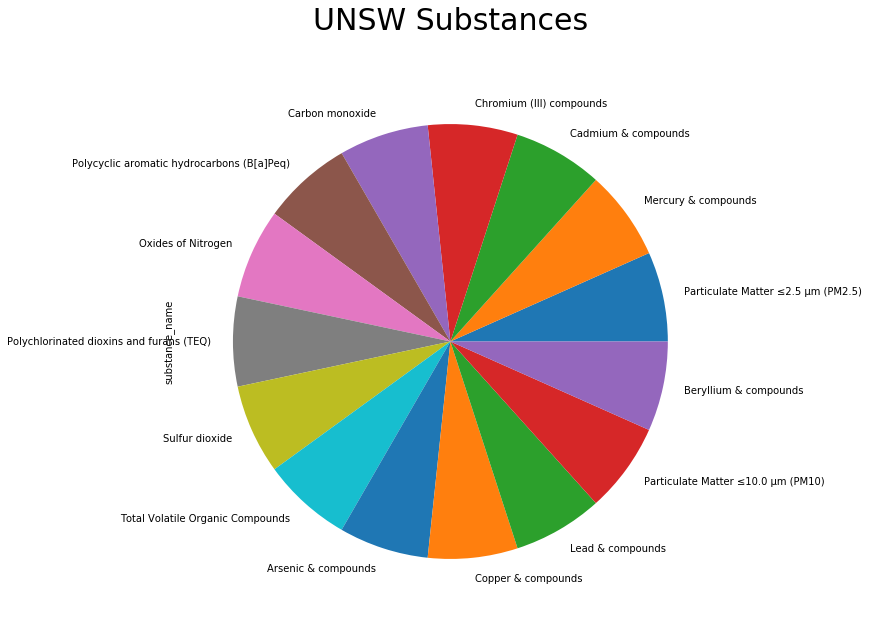

In [95]:
h_edu_subs = higher_edu["substance_name"].value_counts()
h_edu_subs
plt.title("UNSW Substances" "\n", fontsize = 30)
h_edu_subs.plot(kind = 'pie')

53


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52.]), <a list of 53 Text xticklabel objects>)

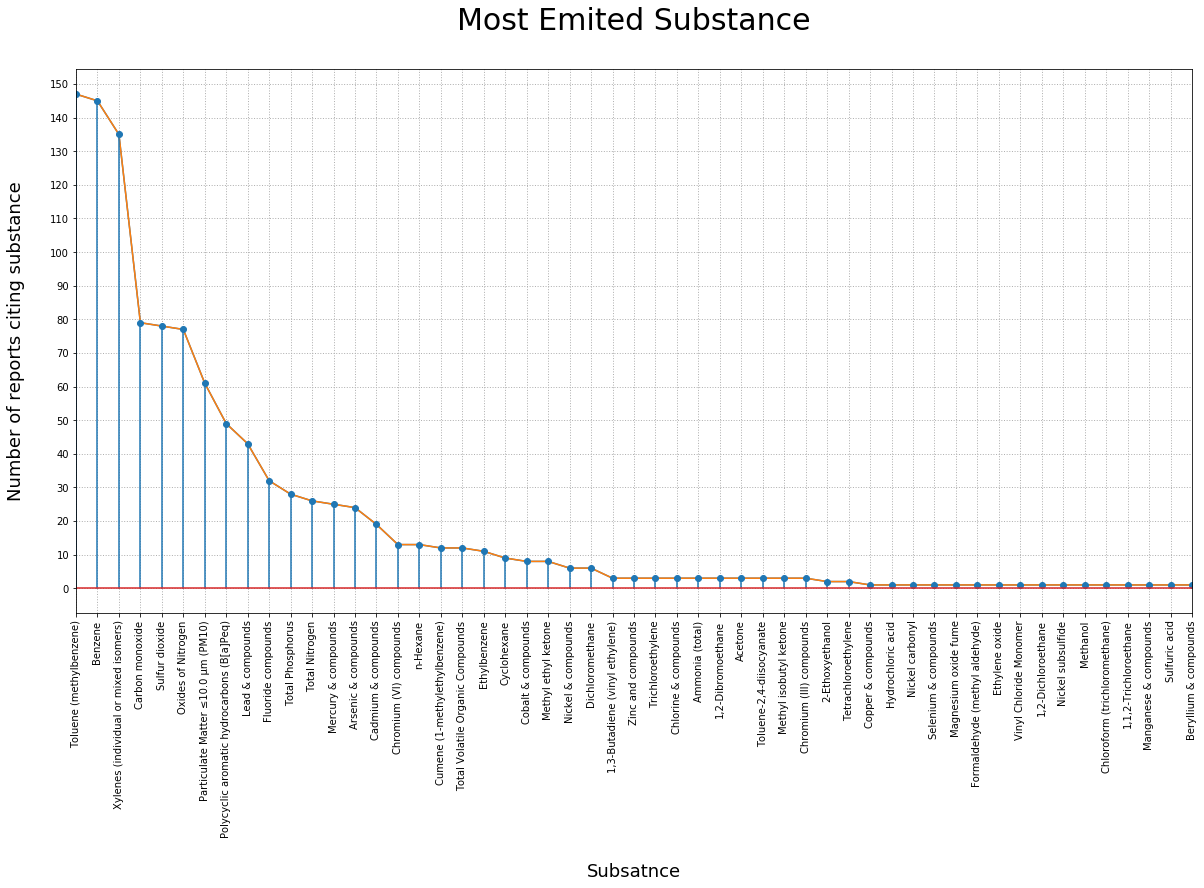

In [33]:
test_val = "1998/1999"

yr_98to99 = nsw_data.loc[nsw_data['report_year'] == test_val]


# yr_98to99.head()

sub_98to99 = yr_98to99["substance_name"].value_counts()

# print(sub_98to99)


sub_98to99.plot()



base_num = len(sub_98to99)
# base_num = int(base_num)
print(base_num)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Most Emited Substance" "\n", fontsize = 30)
plt.ylabel("Number of reports citing substance" "\n", fontsize = 18)
plt.xlabel("\n" "Subsatnce", fontsize = 18)

sub_98to99[collated_substance > 0].plot()
plt.stem(sub_98to99[sub_98to99 > 0])
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <a list of 20 Text xticklabel objects>)

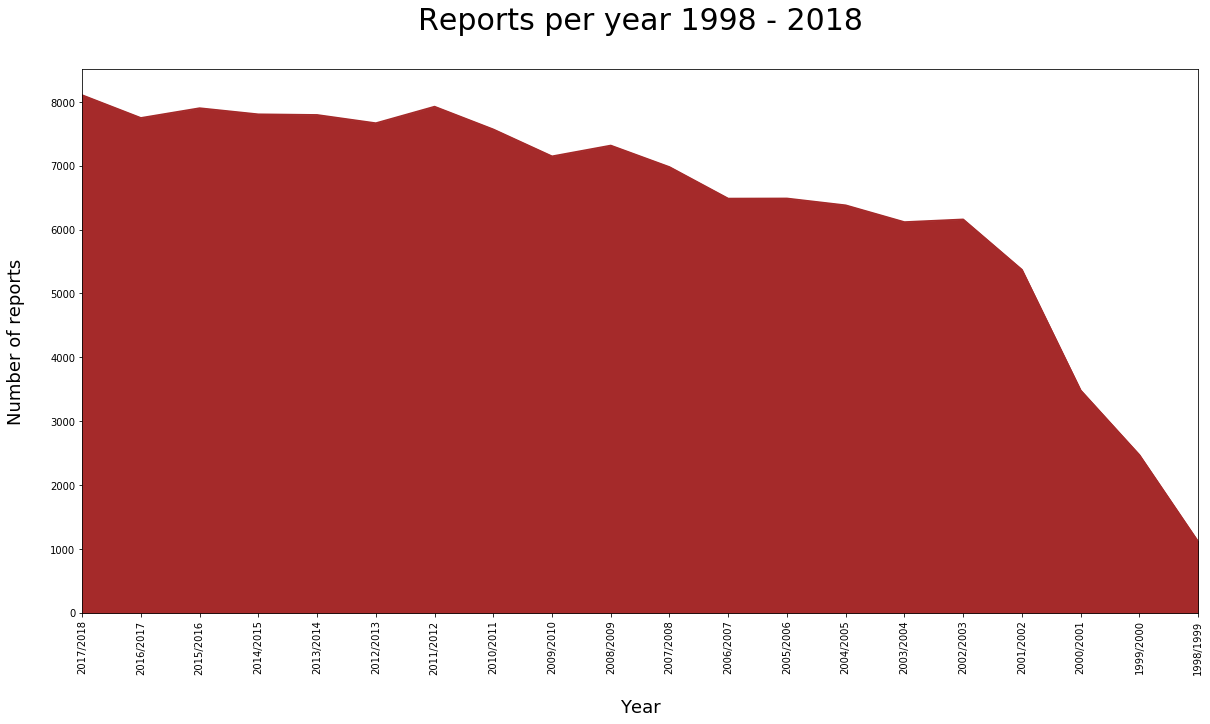

In [34]:
reps_per_year = nsw_data["report_year"].value_counts(sort = False, ascending = False)

reps_per_year.sort_index(inplace = True, ascending = False)

reps_per_year.keys()


plt.locator_params(axis='x', nbins= len(reps_per_year.keys()))

plt.title("Reports per year 1998 - 2018" "\n", fontsize = 30)
plt.ylabel("Number of reports" "\n", fontsize = 18)
plt.xlabel("\n" "Year", fontsize = 18)

reps_per_year.plot(kind = "area", color = 'brown')

plt.xticks(rotation=90)







In [35]:
def sub_plot_year(bool_col, sort_col, start, end, bins):
    
    sub_yr_count = nsw_data[str(bool_col)].value_counts(sort = False, ascending = False)

    sub_yr_count.sort_index(inplace = True, ascending = False)

    years = sub_yr_count.keys()
    
#     base_num = 0
    
    for year in years:

        year_val = str(year)

        crnt_yr = nsw_data.loc[nsw_data[str(bool_col)] == year_val]

        graph =  crnt_yr[str(sort_col)].value_counts()

#         if base_num < len(graph):
#             base_num = len(graph)
#         else:
#             base_num = base_num

        graph.plot()
        
        plt.locator_params(axis='x', nbins= 50)
        
    
    

In [36]:
# def substance_plot(column_name, search_term):
    
#     year_val = str(search_term)

#     crnt_yr = nsw_data.loc[nsw_data[str(column_name)] == year_val]
    
#     return crnt_yr["substance_name"].value_counts()
    
    
    
    

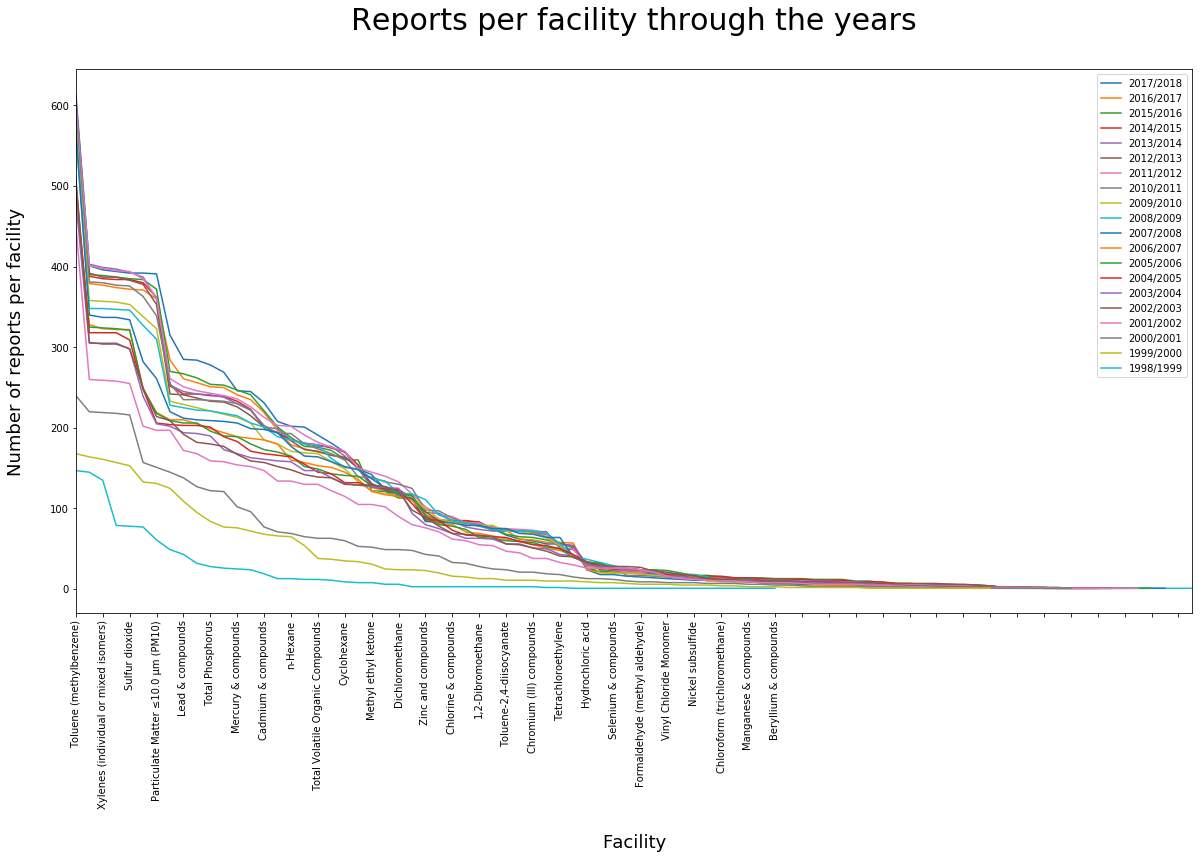

In [37]:
reps_per_year = nsw_data["report_year"].value_counts(sort = False, ascending = False)

reps_per_year.sort_index(inplace = True, ascending = False)

reps_per_year.keys()

plt.title("Reports per facility through the years" "\n", fontsize = 30)
plt.ylabel("Number of reports per facility" "\n", fontsize = 18)
plt.xlabel("\n" "Facility", fontsize = 18)

sub_plot_year("report_year","substance_name",0,-1,30)



plt.xticks(rotation=90)

plt.legend(reps_per_year.keys())



In [38]:
# reps_per_year = nsw_data["report_year"].value_counts(sort = False, ascending = False)

# reps_per_year.sort_index(inplace = True, ascending = False)

# reps_per_year.keys()

# sub_plot_year("report_year","pivot_facility_name",0, -1, 50)

# plt.xticks(rotation=90)

# plt.legend(reps_per_year.keys())


In [39]:
def connect_info(bool_col, sort_col):
    
    sub_yr_count = nsw_data[str(bool_col)].value_counts(sort = False, ascending = False)

    sub_yr_count.sort_index(inplace = True, ascending = False)

    years = sub_yr_count.keys()
    
    g_list = []
    
    for year in years:

        year_val = str(year)

        crnt_yr = nsw_data.loc[nsw_data[str(bool_col)] == year_val]

        graph =  crnt_yr[str(sort_col)].value_counts()
        
        
        graph.rename(str(year))
        
#         print(graph)
        
        g_list.append(graph)
    
    return g_list
        
    



In [40]:
long_coord = connect_info("pivot_facility_name", "longitude")

lat_coord = connect_info("pivot_facility_name", "latitude")

In [41]:
print(long_coord[10])
print(lat_coord[10])

151.42269    91
Name: longitude, dtype: int64
-33.209368    91
Name: latitude, dtype: int64


In [42]:
long_coord[0].index[0]

151.082313

In [43]:
long_coord[0]

151.082313    10
Name: longitude, dtype: int64

# Top 10 offensive facilities 

In [44]:

# Find the top ... facilities 
facility = nsw_data["pivot_facility_name"].value_counts()
facility[:20]

BlueScope Steel Port Kembla Steelworks, Port Kembla NSW (360)                844
Qenos Olefines and Site Utilities Plants, Matraville NSW (139)               709
BANZ, Manufacturing - Springhill, Port Kembla NSW (134)                      682
Tharbogang Landfill, Tharbogang, Griffith NSW (583)                          631
Caltex Kurnell Terminal, Kurnell NSW (298)                                   594
Bloomfield Colliery, Ashtonfield NSW (390)                                   570
Redbank Power (Receivers & Managers Appointed), Warkworth NSW (474)          538
Bulga Coal Surface and Underground Operations, Singleton NSW (337)           528
Rix's Creek Mine, Singleton NSW (356)                                        526
Bindaree Beef Inverell NSW (888)                                             521
Hunter Valley Operations, Lemington Via Singleton NSW (143)                  519
Bayswater Power Station, Muswellbrook NSW (37)                               506
Liddell Power Station, Muswe

In [45]:
# Test for the top ficility before making a funtion to run all the up facilites 
facility[:30]

BlueScope Steel Port Kembla Steelworks, Port Kembla NSW (360)                844
Qenos Olefines and Site Utilities Plants, Matraville NSW (139)               709
BANZ, Manufacturing - Springhill, Port Kembla NSW (134)                      682
Tharbogang Landfill, Tharbogang, Griffith NSW (583)                          631
Caltex Kurnell Terminal, Kurnell NSW (298)                                   594
Bloomfield Colliery, Ashtonfield NSW (390)                                   570
Redbank Power (Receivers & Managers Appointed), Warkworth NSW (474)          538
Bulga Coal Surface and Underground Operations, Singleton NSW (337)           528
Rix's Creek Mine, Singleton NSW (356)                                        526
Bindaree Beef Inverell NSW (888)                                             521
Hunter Valley Operations, Lemington Via Singleton NSW (143)                  519
Bayswater Power Station, Muswellbrook NSW (37)                               506
Liddell Power Station, Muswe

In [46]:
# Find the facility by name 
fac_test = nsw_data.loc[nsw_data['pivot_facility_name'] == facility[:20].index[0]]
print(fac_test)
head_test = fac_test[['pivot_facility_name','latitude','longitude']]
head_test.head()

        report_id report_year  facility_id jurisdiction_code  \
817        499582   2017/2018       487830               NSW   
818        499582   2017/2018       487830               NSW   
819        499582   2017/2018       487830               NSW   
820        499582   2017/2018       487830               NSW   
821        499582   2017/2018       487830               NSW   
822        499582   2017/2018       487830               NSW   
823        499582   2017/2018       487830               NSW   
824        499582   2017/2018       487830               NSW   
825        499582   2017/2018       487830               NSW   
826        499582   2017/2018       487830               NSW   
827        499582   2017/2018       487830               NSW   
828        499582   2017/2018       487830               NSW   
829        499582   2017/2018       487830               NSW   
830        499582   2017/2018       487830               NSW   
831        499582   2017/2018       4878

pivot_facility_name   latitude   longitude
817  BlueScope Steel Port Kembla Steelworks, Port K... -34.463395  150.887662
818  BlueScope Steel Port Kembla Steelworks, Port K... -34.463395  150.887662
819  BlueScope Steel Port Kembla Steelworks, Port K... -34.463395  150.887662
820  BlueScope Steel Port Kembla Steelworks, Port K... -34.463395  150.887662
821  BlueScope Steel Port Kembla Steelworks, Port K... -34.463395  150.887662

In [47]:
# Find the Facilites Longitude

fac_long = fac_test['longitude'].value_counts()

type(fac_long)
top_long = fac_long.index[0]
fac_long

150.887662    844
Name: longitude, dtype: int64

In [48]:
# Find The facilities Latitude 

fac_lat = fac_test['latitude'].value_counts()

type(fac_lat)
top_lat = fac_lat.index[0]

In [49]:
# Make function for top facilities 



In [50]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.drop(["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE"], axis=1, inplace=True)
burbs.head(2)

LC_PLY_PID   DT_CREATE  LOC_PID  NSW_LOCALI     NSW_LOCA_2 NSW_LOCA_5  \
0      25065  2015-09-03  NSW2557  2015-11-10  MAYFIELD WEST          G   
1      16193  2011-11-22  NSW4136  2012-02-04    WALLACETOWN          G   

  NSW_LOCA_6 NSW_LOCA_7                                           geometry  
0       None          1  POLYGON ((151.73344571654 -32.87974104891, 151...  
1       None          1  POLYGON ((147.450924738497 -34.9651865379095, ...

LC_PLY_PID                                                25065
DT_CREATE                                            2015-09-03
LOC_PID                                                 NSW2557
NSW_LOCALI                                           2015-11-10
NSW_LOCA_2                                        MAYFIELD WEST
NSW_LOCA_5                                                    G
NSW_LOCA_6                                                 None
NSW_LOCA_7                                                    1
geometry      POLYGON ((151.73344571654 -32.87974104891, 151...
Name: 0, dtype: object


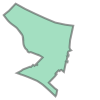

In [51]:
a = burbs.iloc[0]
print(a)
a.geometry

In [52]:
def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

In [53]:
right_here = shapely.geometry.point.Point(top_long, top_lat)
burbs["distance_from_facility"] = burbs.geometry.distance(right_here)

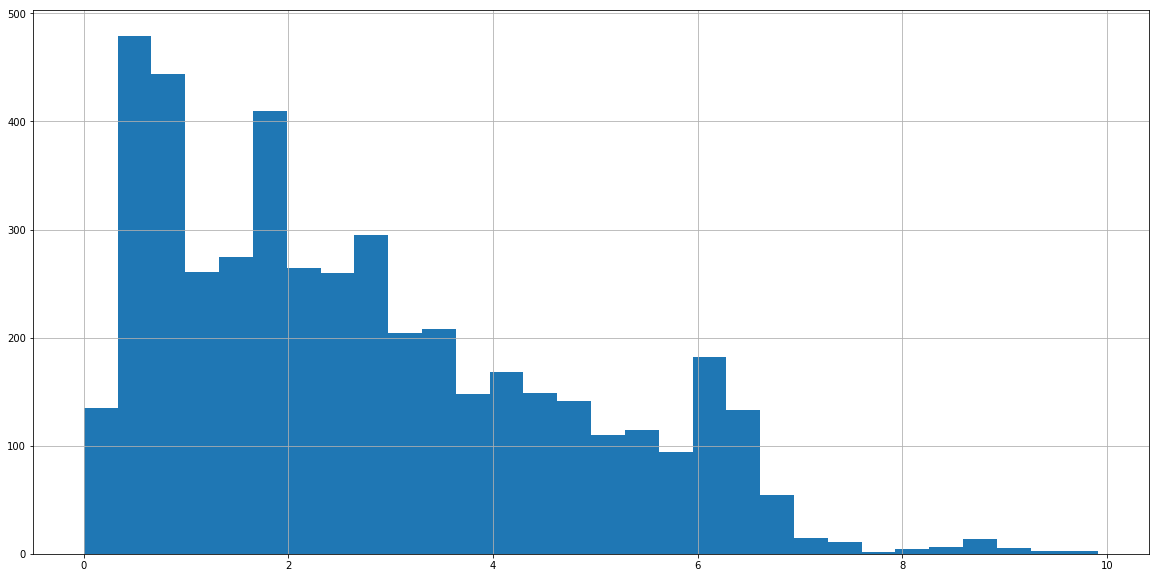

In [54]:
burbs.distance_from_facility.hist(bins=30);

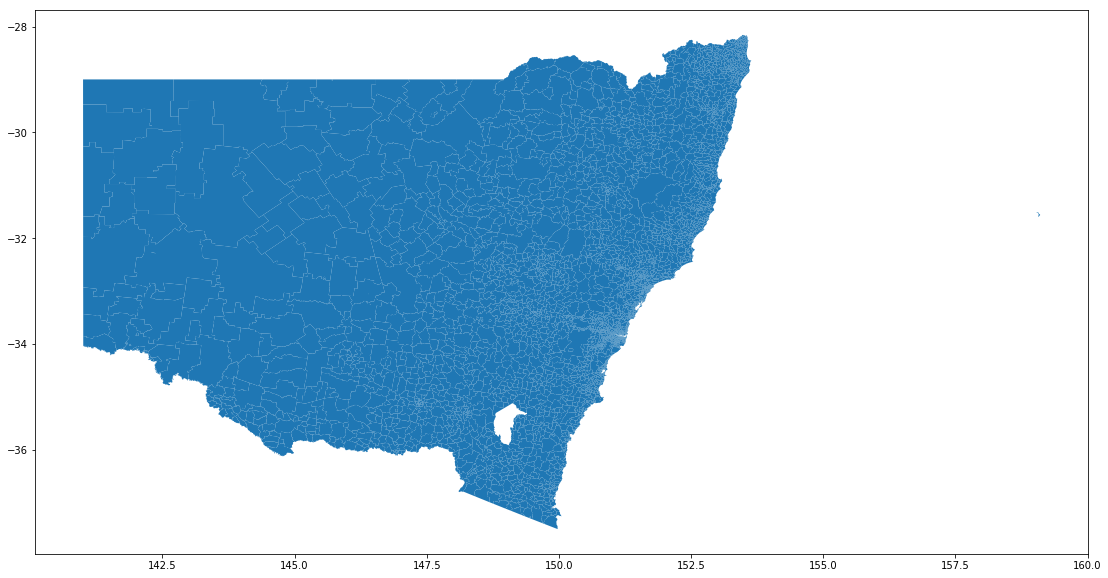

In [55]:
close_burbs = burbs[burbs.distance_from_facility<0.2]
burbs.plot();

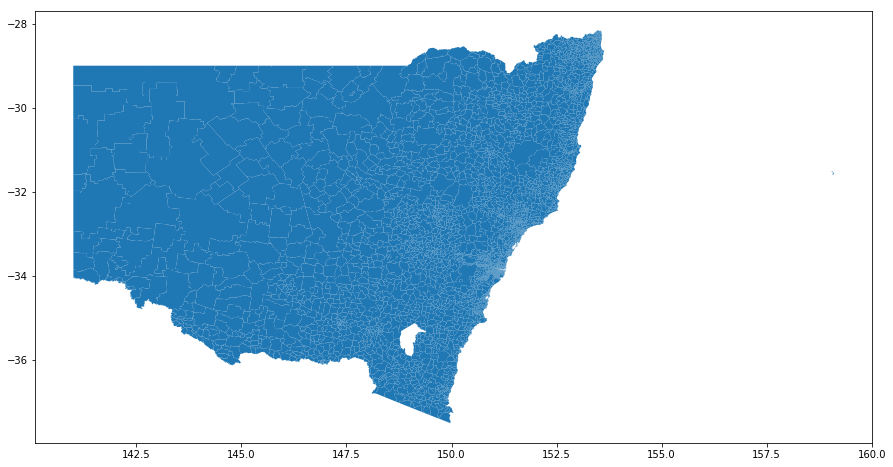

In [56]:
fig,ax = plt.subplots(figsize = (15,15))
burbs.plot(ax = ax)

In [57]:
geometry = [shapely.geometry.point.Point(xy) for xy in zip(fac_test["longitude"], fac_test["latitude"])]
geometry[:5]

In [58]:
crs = {'init': 'espg:4326'}
top_test = gp.GeoDataFrame(fac_test, crs=crs, geometry = geometry)
top_test.head()
# top_test.to_excel(r'C:\Users\Nimat\1161\data_project\test.xlsx')

report_id report_year  facility_id jurisdiction_code  \
817     499582   2017/2018       487830               NSW   
818     499582   2017/2018       487830               NSW   
819     499582   2017/2018       487830               NSW   
820     499582   2017/2018       487830               NSW   
821     499582   2017/2018       487830               NSW   

     jurisdiction_facility_id                           facility_name  \
817                       360  BlueScope Steel Port Kembla Steelworks   
818                       360  BlueScope Steel Port Kembla Steelworks   
819                       360  BlueScope Steel Port Kembla Steelworks   
820                       360  BlueScope Steel Port Kembla Steelworks   
821                       360  BlueScope Steel Port Kembla Steelworks   

          registered_business_name  primary_anzsic_class_code  \
817  BLUESCOPE STEEL (AIS) PTY LTD                       2110   
818  BLUESCOPE STEEL (AIS) PTY LTD                       2110   
819  BLUESCOPE STEEL (AIS) PTY LTD                       2110   
820  BLUESCOPE STEEL (AIS) PTY LTD                       2110   
821  BLUESCOPE STEEL (AIS) PTY LTD                       2110   

                 primary_anzsic_class_name  substance_id  ...  water_eet  \
817  Iron Smelting and Steel Manufacturing             3  ...        NaN   
818  Iron Smelting and Steel Manufacturing             8  ...      __3__   
819  Iron Smelting and Steel Manufacturing            10  ...        NaN   
820  Iron Smelting and Steel Manufacturing            11  ...        NaN   
821  Iron Smelting and Steel Manufacturing            12  ...        NaN   

    land_emission_kg  land_eet       suburb  state postcode   latitude  \
817              NaN       NaN  Port Kembla    NSW     2505 -34.463395   
818              NaN       NaN  Port Kembla    NSW     2505 -34.463395   
819              NaN       NaN  Port Kembla    NSW     2505 -34.463395   
820              NaN       NaN  Port Kembla    NSW     2505 -34.463395   
821              NaN       NaN  Port Kembla    NSW     2505 -34.463395   

      longitude                                pivot_facility_name  \
817  150.887662  BlueScope Steel Port Kembla Steelworks, Port K...   
818  150.887662  BlueScope Steel Port Kembla Steelworks, Port K...   
819  150.887662  BlueScope Steel Port Kembla Steelworks, Port K...   
820  150.887662  BlueScope Steel Port Kembla Steelworks, Port K...   
821  150.887662  BlueScope Steel Port Kembla Steelworks, Port K...   

                          geometry  
817  POINT (150.887662 -34.463395)  
818  POINT (150.887662 -34.463395)  
819  POINT (150.887662 -34.463395)  
820  POINT (150.887662 -34.463395)  
821  POINT (150.887662 -34.463395)  

[5 rows x 28 columns]

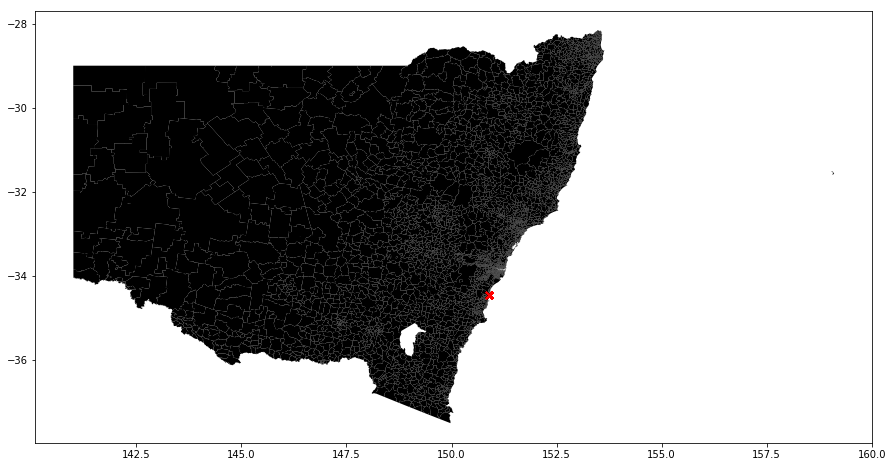

In [59]:
fig,ax = plt.subplots(figsize = (15,15))
burbs.plot(ax = ax, alpha = 1, color="black")
top_test.plot(ax = ax, markersize = 40, color = "red", marker = "x", label = "Test")

In [60]:
# Find the top ... facilities 
tf = nsw_data["pivot_facility_name"].value_counts()
print(len(tf))
t30_f = tf[:30]
t30_f


print(len(tf))



1396
1396


In [61]:
test_name = t30_f.index[0]
test_name

t30_f


BlueScope Steel Port Kembla Steelworks, Port Kembla NSW (360)                844
Qenos Olefines and Site Utilities Plants, Matraville NSW (139)               709
BANZ, Manufacturing - Springhill, Port Kembla NSW (134)                      682
Tharbogang Landfill, Tharbogang, Griffith NSW (583)                          631
Caltex Kurnell Terminal, Kurnell NSW (298)                                   594
Bloomfield Colliery, Ashtonfield NSW (390)                                   570
Redbank Power (Receivers & Managers Appointed), Warkworth NSW (474)          538
Bulga Coal Surface and Underground Operations, Singleton NSW (337)           528
Rix's Creek Mine, Singleton NSW (356)                                        526
Bindaree Beef Inverell NSW (888)                                             521
Hunter Valley Operations, Lemington Via Singleton NSW (143)                  519
Bayswater Power Station, Muswellbrook NSW (37)                               506
Liddell Power Station, Muswe

In [62]:
# def get_name_lat_long(row):
#     fac = nsw_data.loc[nsw_data['pivot_facility_name'] == row]
# #     fac4 = fac[['pivot_facility_name','longitude','latitude']]
#     new = fac.iloc[1].to_dict()
# #     print(new)
# #     new.to_excel(r'C:\Users\Nimat\1161\data_project\test.xlsx')
#     return new





# # tree.to_excel(r'C:\Users\Nimat\1161\data_project\test.xlsx')

# empty_data = nsw_data.head(0)

# empty_data.to_excel(r'C:\Users\Nimat\1161\data_project\top_30.xlsx')

# tp30 = pd.read_excel("top_30.xlsx")

# # pf_name = []

# # for i in range(len(t30_f)):
# #     pf_name.append(t30_f.index[i])

# # print(pf_name)


# for name in pf_name:
#     data_dict = get_name_lat_long(name)
#     print(dd)
#     tp30.append(data_dict, ignore_index = True)
    
# tp30

# # data_dict = nsw_data.iloc[0].to_dict()
# # print(data_dict)

# # tp30.append(data_dict, ignore_index = True)


In [63]:
def get_lat(row):
    fac = nsw_data.loc[nsw_data['pivot_facility_name'] == row]
    fac_lat = fac['latitude'].value_counts()
    f_lat = fac_lat.index[0]
    return f_lat
    

def get_long(row):
    fac = nsw_data.loc[nsw_data['pivot_facility_name'] == row]
    fac_long = fac['longitude'].value_counts()
    f_long = fac_long.index[0]
    return f_long


pf_name = []
lats = []
longs = []

for i in range(len(t30_f)):
    pf_name.append(t30_f.index[i])

for name in pf_name:
    lats.append(get_lat(name))
    longs.append(get_long(name))
    

for i in range(len(pf_name)):
    print(pf_name[i])
    print(lats[i])
    print(longs[i],'/n')
    

loc_dict = {
    "facility" : [],
    "lat" : [],
    "long" : [],
}

for i in range(len(pf_name)):
    loc_dict['facility'].append(pf_name[i])
    loc_dict['lat'].append(lats[i])
    loc_dict['long'].append(longs[i])

    
loc_dict
    


BlueScope Steel Port Kembla Steelworks, Port Kembla NSW (360)
-34.463395
150.887662 /n
Qenos Olefines and Site Utilities Plants, Matraville NSW (139)
-33.957701
151.223104 /n
BANZ, Manufacturing - Springhill, Port Kembla NSW (134)
-34.458451
150.873417 /n
Tharbogang Landfill, Tharbogang, Griffith NSW (583)
-34.239808
145.980481 /n
Caltex Kurnell Terminal, Kurnell NSW (298)
-34.016405
151.214205 /n
Bloomfield Colliery, Ashtonfield NSW (390)
-32.796536
151.569052 /n
Redbank Power (Receivers & Managers Appointed), Warkworth NSW (474)
-32.579584
151.072553 /n
Bulga Coal Surface and Underground Operations, Singleton NSW (337)
-32.676997
151.090884 /n
Rix's Creek Mine, Singleton NSW (356)
-32.499201
151.131857 /n
Bindaree Beef Inverell NSW (888)
-29.764444
151.058389 /n
Hunter Valley Operations, Lemington Via Singleton NSW (143)
-32.469337
150.986219 /n
Bayswater Power Station, Muswellbrook NSW (37)
-32.395556
150.948889 /n
Liddell Power Station, Muswellbrook NSW (151)
-32.371724
150.977589 

{'facility': ['BlueScope Steel Port Kembla Steelworks, Port Kembla NSW (360)',
  'Qenos Olefines and Site Utilities Plants, Matraville NSW (139)',
  'BANZ, Manufacturing - Springhill, Port Kembla NSW (134)',
  'Tharbogang Landfill, Tharbogang, Griffith NSW (583)',
  'Caltex Kurnell Terminal, Kurnell NSW (298)',
  'Bloomfield Colliery, Ashtonfield NSW (390)',
  'Redbank Power (Receivers & Managers Appointed), Warkworth NSW (474)',
  'Bulga Coal Surface and Underground Operations, Singleton NSW (337)',
  "Rix's Creek Mine, Singleton NSW (356)",
  'Bindaree Beef Inverell NSW (888)',
  'Hunter Valley Operations, Lemington Via Singleton NSW (143)',
  'Bayswater Power Station, Muswellbrook NSW (37)',
  'Liddell Power Station, Muswellbrook NSW (151)',
  'Mount Thorley Warkworth Operations, Mount Thorley Via Singleton NSW (427)',
  'Glencore Coal - Mt Owen (Open Cut) Mine, Ravensworth NSW (555)',
  'Eraring Power Station, Eraring NSW (226)',
  'Harwood Sugar Mill and Refinery, Harwood NSW (7)'

In [64]:
geometry30 = [shapely.geometry.point.Point(xy) for xy in zip(loc_dict["long"], loc_dict["lat"])]
geometry30[:5]

In [65]:
crs = {'init': 'espg:4326'}
top_test = gp.GeoDataFrame(crs=crs, geometry = geometry30)
top_test.head(30)

geometry
0   POINT (150.887662 -34.463395)
1   POINT (151.223104 -33.957701)
2   POINT (150.873417 -34.458451)
3   POINT (145.980481 -34.239808)
4   POINT (151.214205 -34.016405)
5   POINT (151.569052 -32.796536)
6   POINT (151.072553 -32.579584)
7   POINT (151.090884 -32.676997)
8   POINT (151.131857 -32.499201)
9   POINT (151.058389 -29.764444)
10  POINT (150.986219 -32.469337)
11  POINT (150.948889 -32.395556)
12  POINT (150.977589 -32.371724)
13   POINT (151.085868 -32.64319)
14  POINT (151.090601 -32.393157)
15  POINT (151.520379 -33.061849)
16  POINT (153.248595 -29.423692)
17  POINT (150.861779 -32.337182)
18  POINT (150.827249 -32.276943)
19   POINT (151.142781 -32.48293)
20   POINT (151.037444 -33.82375)
21  POINT (150.991427 -32.568122)
22  POINT (148.203461 -35.303934)
23  POINT (148.976113 -33.435545)
24  POINT (150.032885 -33.358735)
25  POINT (148.051197 -32.898451)
26   POINT (151.737239 -32.88581)
27  POINT (151.543337 -33.160977)
28  POINT (145.996641 -35.991382)
29   POINT (151.046379 -33.84974)

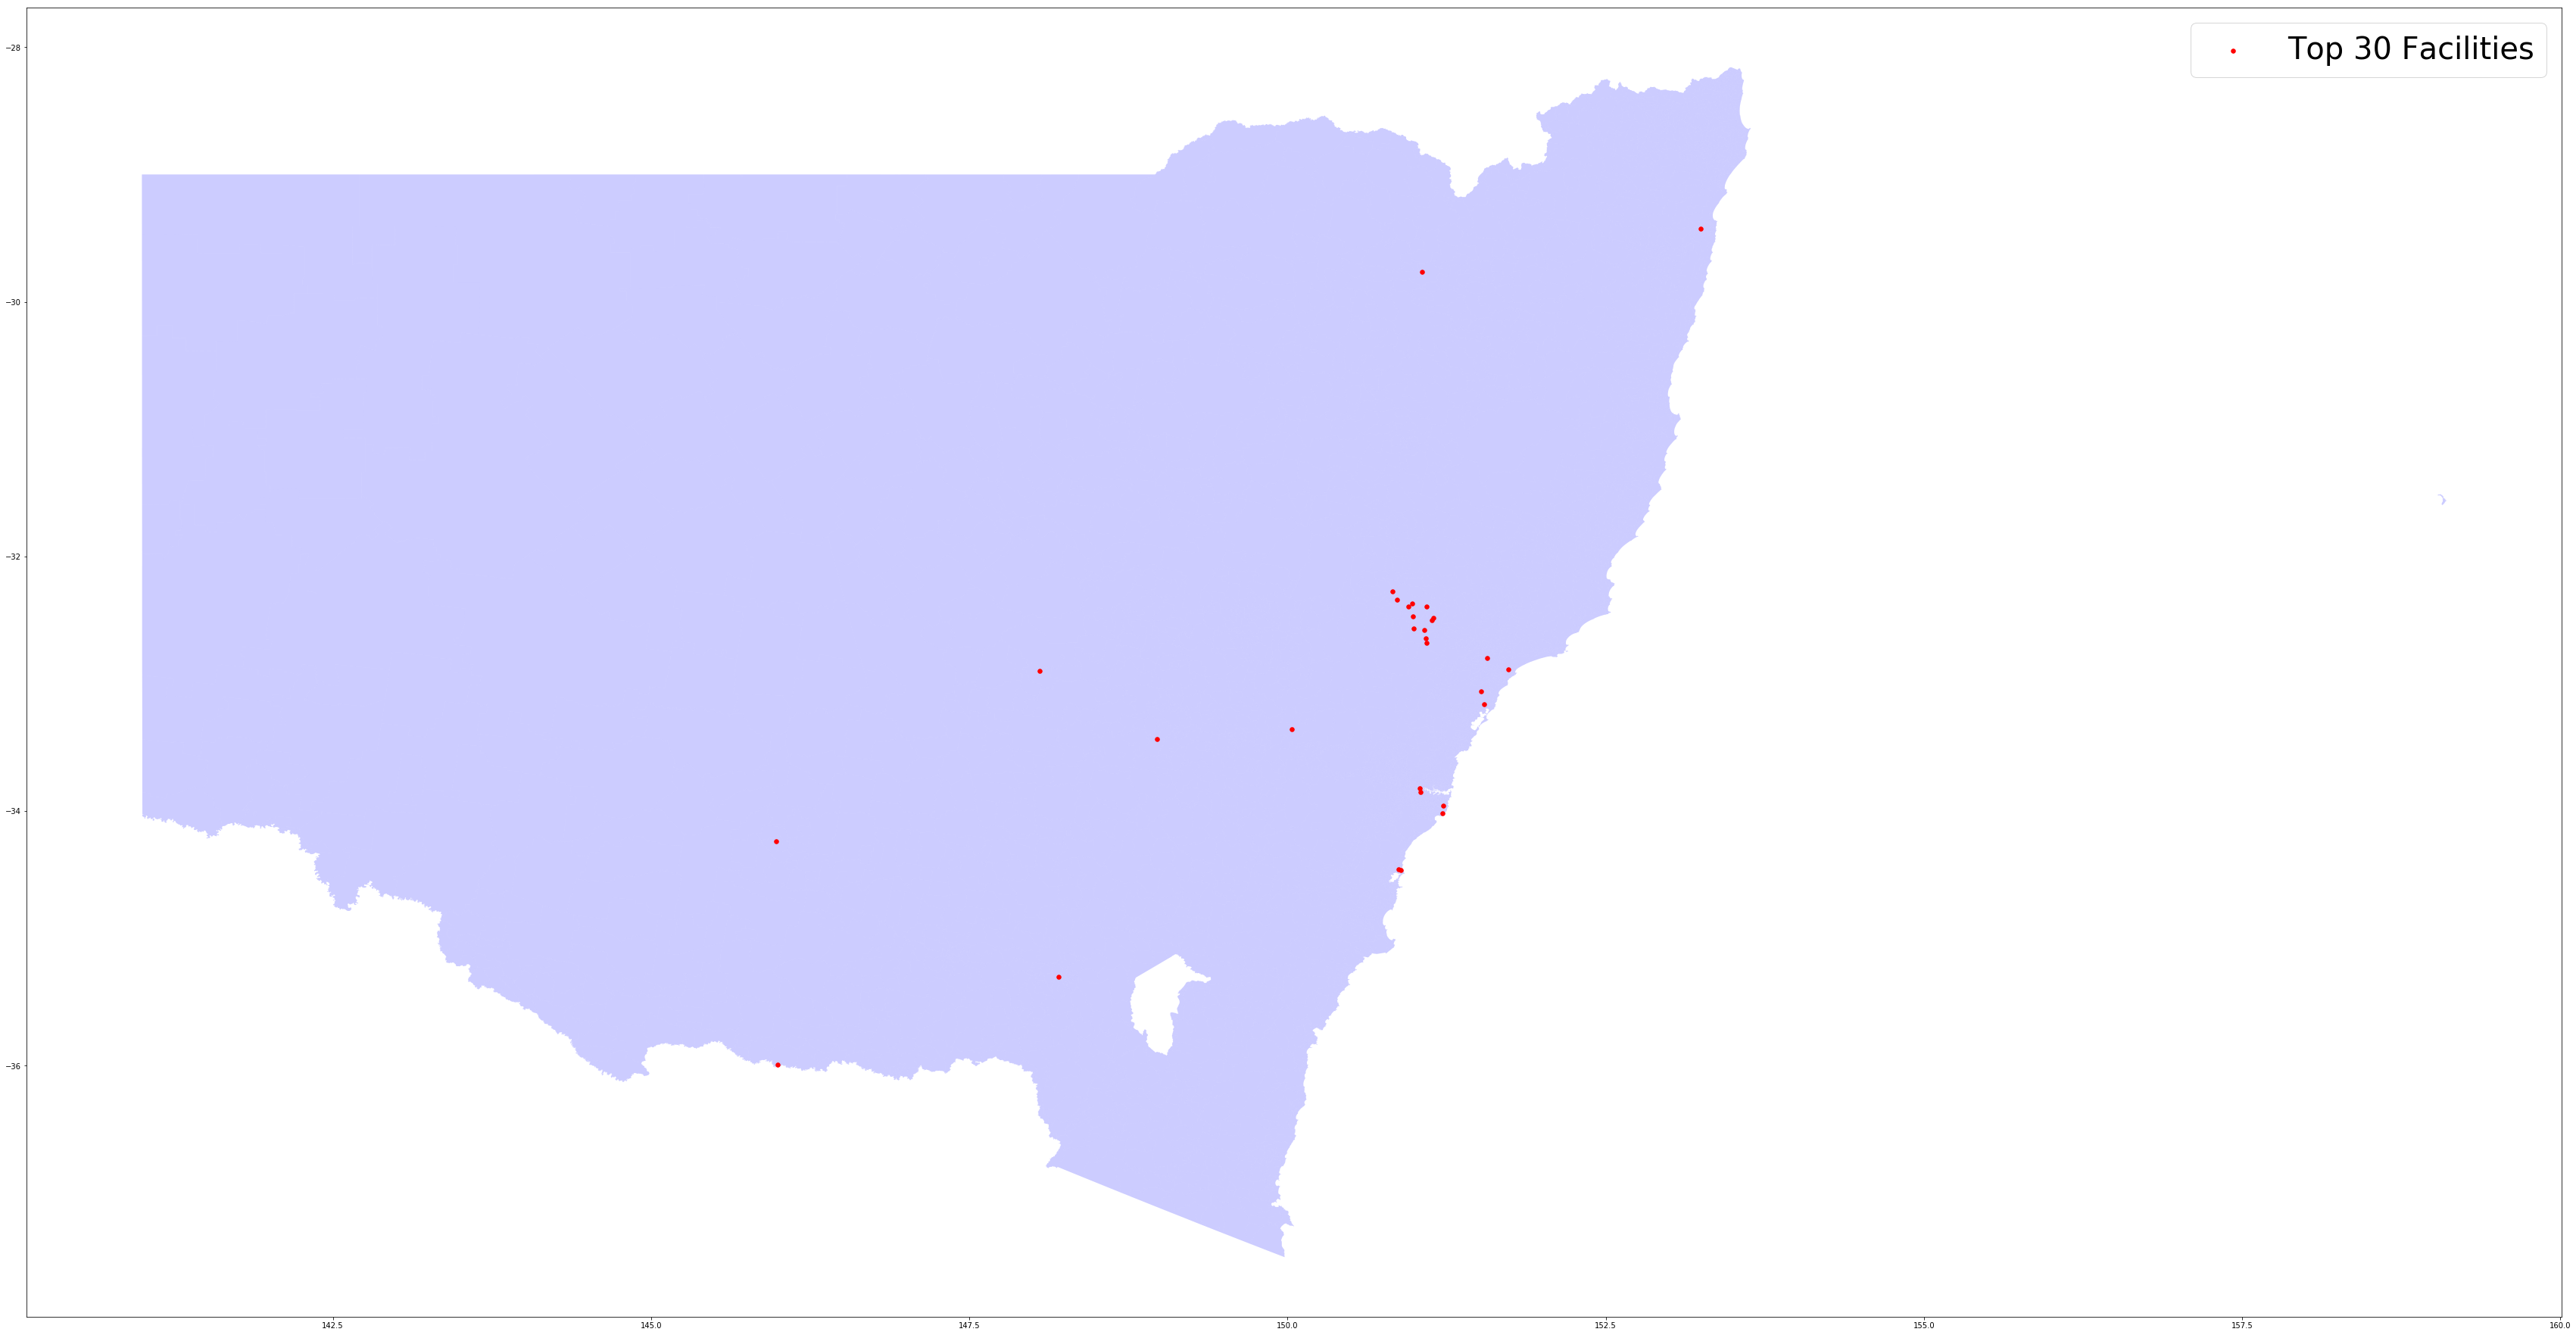

In [66]:
fig,ax = plt.subplots(figsize = (60,60))
burbs.plot(ax = ax, alpha = 0.2, color= "blue")
top_test.plot(ax = ax, markersize = 30, color = "red", marker = "o", label = "Top 30 Facilities")
plt.legend(prop={'size': 40})


In [67]:

all_names = []
all_lats = []
all_longs = []

print(len(tf))

for i in range(len(tf)):
    all_names.append(tf.index[i])

for name in all_names:
    all_lats.append(get_lat(name))
    all_longs.append(get_long(name))
    

for i in range(len(all_names)):
    print(all_names[i])
    print(all_lats[i])
    print(all_longs[i],'/n')
    

all_loc_dict = {
    "facility" : [],
    "lat" : [],
    "long" : [],
}

for i in range(len(all_names)):
    all_loc_dict['facility'].append(all_names[i])
    all_loc_dict['lat'].append(all_lats[i])
    all_loc_dict['long'].append(all_longs[i])

    
all_loc_dict[:5]

1396
BlueScope Steel Port Kembla Steelworks, Port Kembla NSW (360)
-34.463395
150.887662 /n
Qenos Olefines and Site Utilities Plants, Matraville NSW (139)
-33.957701
151.223104 /n
BANZ, Manufacturing - Springhill, Port Kembla NSW (134)
-34.458451
150.873417 /n
Tharbogang Landfill, Tharbogang, Griffith NSW (583)
-34.239808
145.980481 /n
Caltex Kurnell Terminal, Kurnell NSW (298)
-34.016405
151.214205 /n
Bloomfield Colliery, Ashtonfield NSW (390)
-32.796536
151.569052 /n
Redbank Power (Receivers & Managers Appointed), Warkworth NSW (474)
-32.579584
151.072553 /n
Bulga Coal Surface and Underground Operations, Singleton NSW (337)
-32.676997
151.090884 /n
Rix's Creek Mine, Singleton NSW (356)
-32.499201
151.131857 /n
Bindaree Beef Inverell NSW (888)
-29.764444
151.058389 /n
Hunter Valley Operations, Lemington Via Singleton NSW (143)
-32.469337
150.986219 /n
Bayswater Power Station, Muswellbrook NSW (37)
-32.395556
150.948889 /n
Liddell Power Station, Muswellbrook NSW (151)
-32.371724
150.97

149.860115 /n
Australian Vintage Buronga Hill Winery, Buronga NSW (1127)
-34.153503
142.180365 /n
Boral Hall Quarry, Hall NSW (1291)
-35.090547
149.026754 /n
Cleanaway Refining Rutherford NSW (1130)
-32.70739
151.499221 /n
Stotts Creek Renewable Energy Facility, Stotts Creek NSW (1164)
-28.290752
153.498356 /n
Bungendore Sand, Bungendore NSW (1262)
-35.23788
149.444917 /n
Sydney Trains Sydenham Maintenance Centre, Sydenham NSW (696)
-33.916659
151.161233 /n
Belmont Wastewater Treatment Works, Belmont NSW (428)
-33.046716
151.67023 /n
Boral Shadforth (Orange) Quarry, Shadforth NSW (1294)
-33.383177
149.18161 /n
Boral Prospect Quarry, Prospect NSW (450)
-33.802129
150.91964 /n
Albury Renewable Energy Facility, Hamilton Valley NSW (1390)
-36.029825
146.897619 /n
Infrastructure Works Wetherill Park NSW (440)
-33.840112
150.896183 /n
VEOLIA ENVIRONMENTAL SERVICES (AUSTRALIA) PTY LTD, Horsley Park NSW (1417)
-33.82336799999999
150.859461 /n
Winmalee Sewage Treatment Plant, Winmalee NSW (88)


153.422713 /n
PPG VILLAWOOD NSW (1355)
-33.879316
150.985969 /n
Mount Pleasant Operations, Muswellbrook  NSW (1492)
-32.259411
150.837135 /n
Maclean Depot - Reliance Petroleum, Maclean NSW (606)
-29.448415
153.217762 /n
Pax Australia, Ingleburn NSW (1484)
-33.995605
150.85093 /n
Muswellbrook Quarry, Muswellbrook NSW (1381)
-32.235292
150.923031 /n
Michelago Compressor Station, Michelago NSW (1471)
-35.687532
149.19122 /n
Eastern Creek Waste Management Centre (closed landfill), Eastern Creek NSW (850)
-33.813671
150.856534 /n
Marrangaroo Quartzite Quarry, Lithgow NSW (470)
-33.468199
150.639143 /n
BEKAERT WIRE ROPES, Mayfield East NSW (753)
-32.890279
151.752944 /n
Lismore Depot - Reliance Petroleum, Lismore NSW (607)
-28.798413
153.284419 /n
McWilliams Hanwood Winery, Hanwood NSW (1036)
-34.347756
146.045186 /n
Boral Bricks - Moorebank NSW (146)
-33.934796
150.953567 /n
Mount Pleasant Wines, Pokolbin NSW (1037)
-32.816998
151.286974 /n
Neumann Petroleum Tweed Heads Depot, South Tweed H

149.253291 /n
Shell Coffs Harbour Airport Depot, Coffs Harbour NSW (522)
-30.31564
153.117778 /n
Bathurst Meter Station, Bathurst NSW (1396)
-33.45236
149.590052 /n
Dubbo Meter Station, Dubbo NSW (1402)
-32.21368
148.633266 /n
Marsden Meter Station, West Wyalong NSW (1405)
-33.777327
147.508702 /n
Cootamundra Meter Station, Cootamundra NSW (1400)
-34.630933
148.009566 /n
Orange Meter Station, Orange NSW (1409)
-33.311332
149.103634 /n
British American Tobacco Granville Plant, South Granville NSW (414)
-33.865585
151.008726 /n
Teralba Colliery, Teralba NSW (496)
-32.967573
151.60343 /n
Lithgow Meter Station, Lithgow NSW (1404)
-33.460728
150.121755 /n
Wattle Ridge Rearing Farm, West Wyalong NSW (1089)
-33.851515
147.138721 /n
Wagga Wagga Meter Station, Bomen NSW (1410)
-35.07804
147.412524 /n
Air BP Mascot NSW (796)
-33.934404
151.187249 /n
Windy Station Feedlot, Pine Ridge NSW (1469)
-31.599472
150.381136 /n
Baiada Dungowan 1 Poultry Facility, Dungowan NSW (879)
-31.256764
151.136413 /

TypeError: unhashable type: 'slice'

In [68]:
geometry_all = [shapely.geometry.point.Point(xy) for xy in zip(all_loc_dict["long"], all_loc_dict["lat"])]
geometry_all[:5]

In [69]:
all_loc = gp.GeoDataFrame(crs=crs, geometry = geometry_all)
print(len(all_loc))
all_loc.head(30)

1396


geometry
0   POINT (150.887662 -34.463395)
1   POINT (151.223104 -33.957701)
2   POINT (150.873417 -34.458451)
3   POINT (145.980481 -34.239808)
4   POINT (151.214205 -34.016405)
5   POINT (151.569052 -32.796536)
6   POINT (151.072553 -32.579584)
7   POINT (151.090884 -32.676997)
8   POINT (151.131857 -32.499201)
9   POINT (151.058389 -29.764444)
10  POINT (150.986219 -32.469337)
11  POINT (150.948889 -32.395556)
12  POINT (150.977589 -32.371724)
13   POINT (151.085868 -32.64319)
14  POINT (151.090601 -32.393157)
15  POINT (151.520379 -33.061849)
16  POINT (153.248595 -29.423692)
17  POINT (150.861779 -32.337182)
18  POINT (150.827249 -32.276943)
19   POINT (151.142781 -32.48293)
20   POINT (151.037444 -33.82375)
21  POINT (150.991427 -32.568122)
22  POINT (148.203461 -35.303934)
23  POINT (148.976113 -33.435545)
24  POINT (150.032885 -33.358735)
25  POINT (148.051197 -32.898451)
26   POINT (151.737239 -32.88581)
27  POINT (151.543337 -33.160977)
28  POINT (145.996641 -35.991382)
29   POINT (151.046379 -33.84974)

# Facility locations in NSW

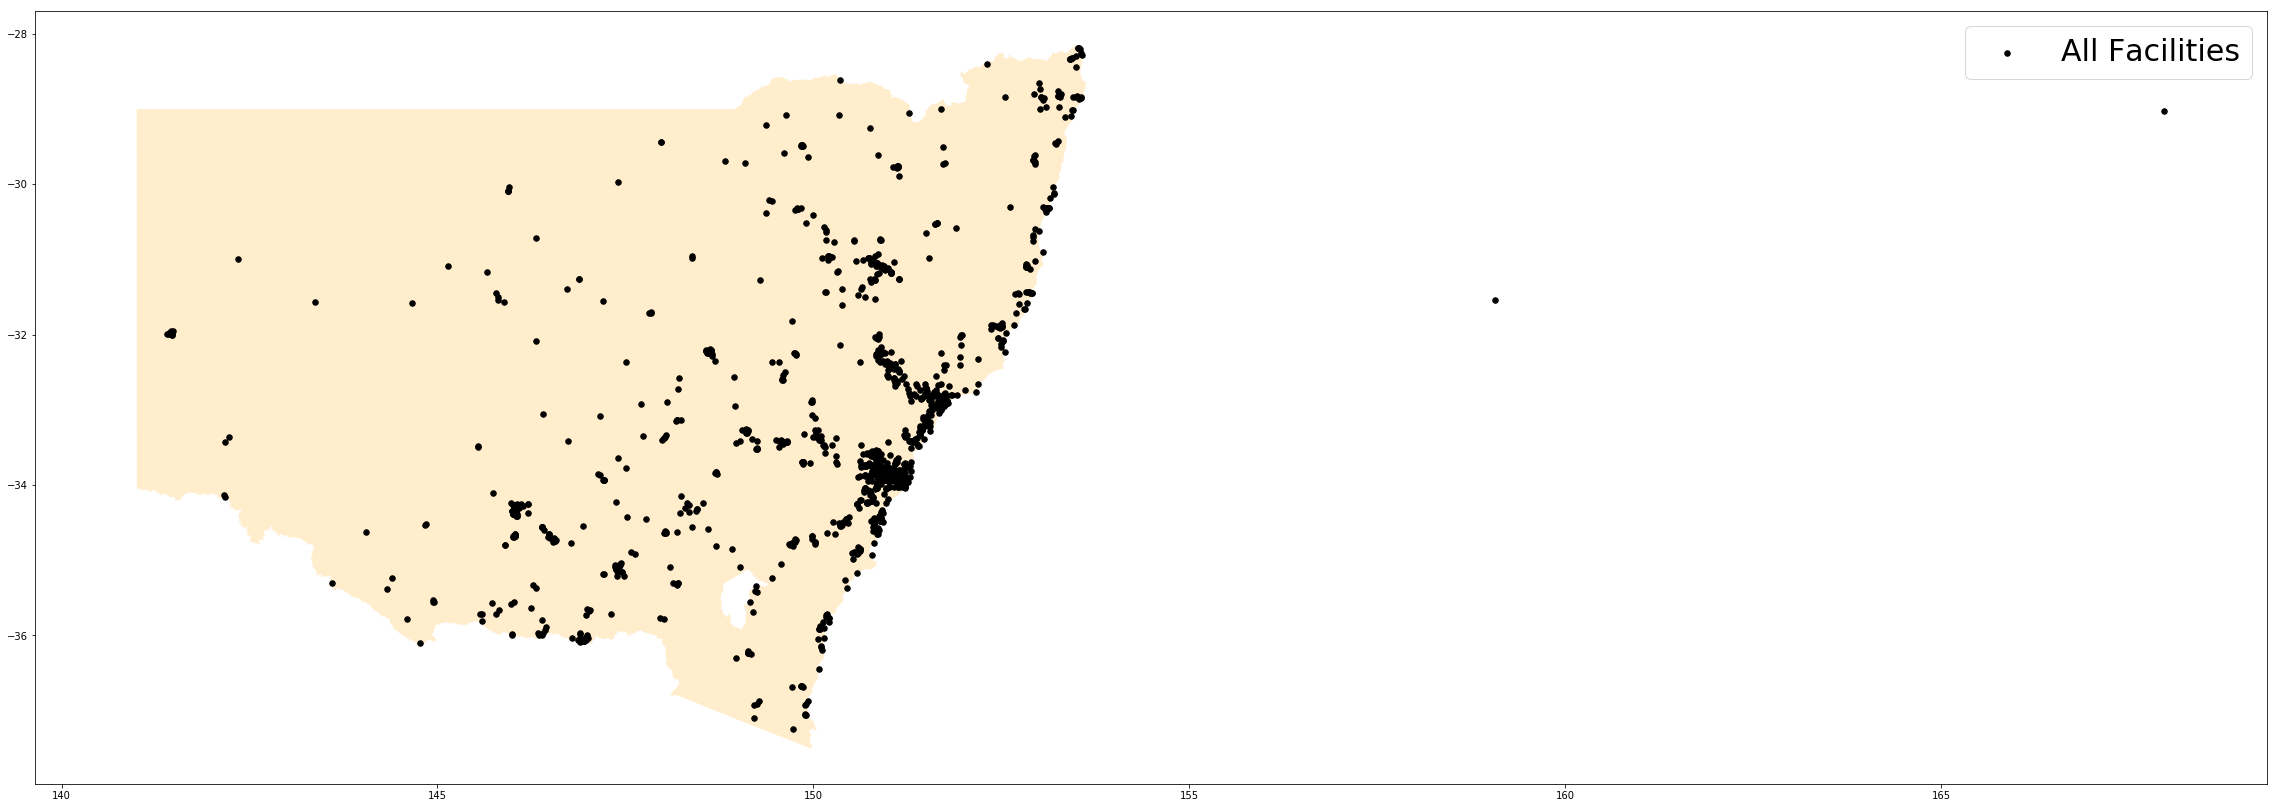

In [70]:
fig,ax = plt.subplots(figsize = (40,40))
burbs.plot(ax = ax, alpha = 0.2, color= "orange")
# top_test.plot(ax = ax, markersize = 500, color = "red", marker = "o", label = "Top 30 Facilities")
all_loc.plot(ax = ax, markersize = 30, color = "black", marker = "o", label = "All Facilities")
plt.legend(prop={'size': 30}, loc = 1)

# Facility locations in NSW - Top 30

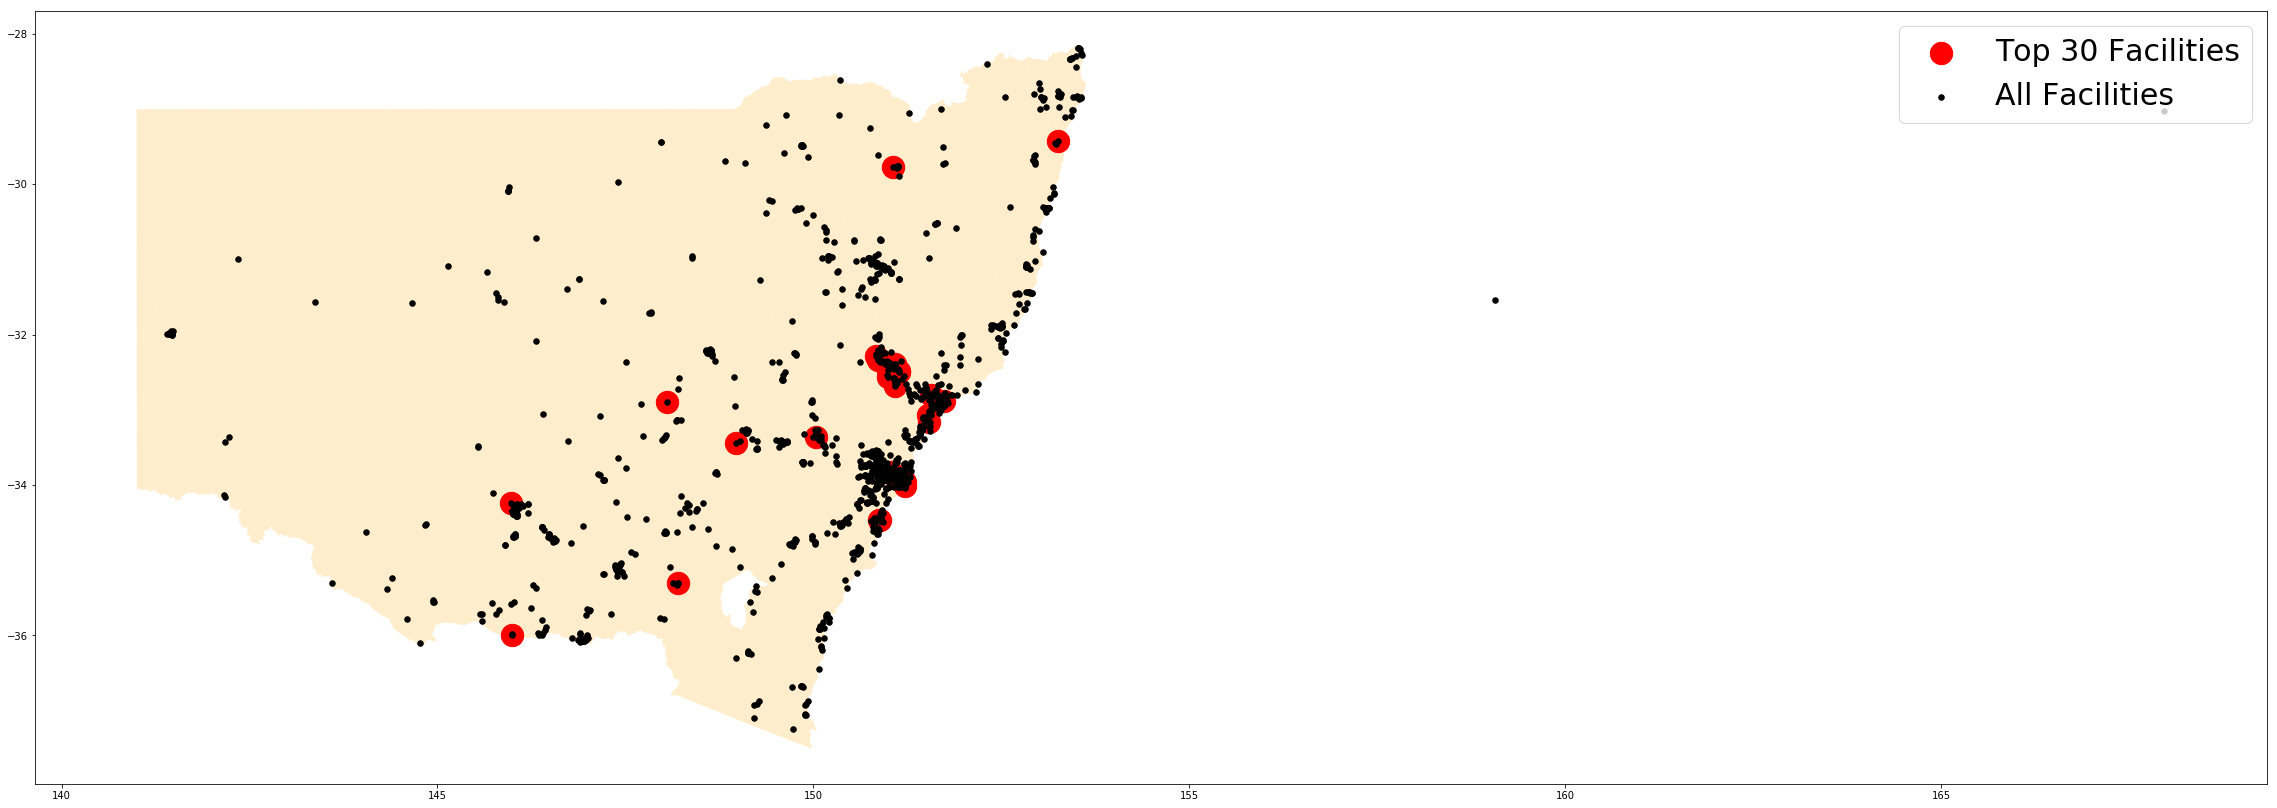

In [71]:
fig,ax = plt.subplots(figsize = (40,40))
burbs.plot(ax = ax, alpha = 0.2, color= "orange")
top_test.plot(ax = ax, markersize = 500, color = "red", marker = "o", label = "Top 30 Facilities")
all_loc.plot(ax = ax, markersize = 30, color = "black", marker = "o", label = "All Facilities")
plt.legend(prop={'size': 30}, loc = 1)


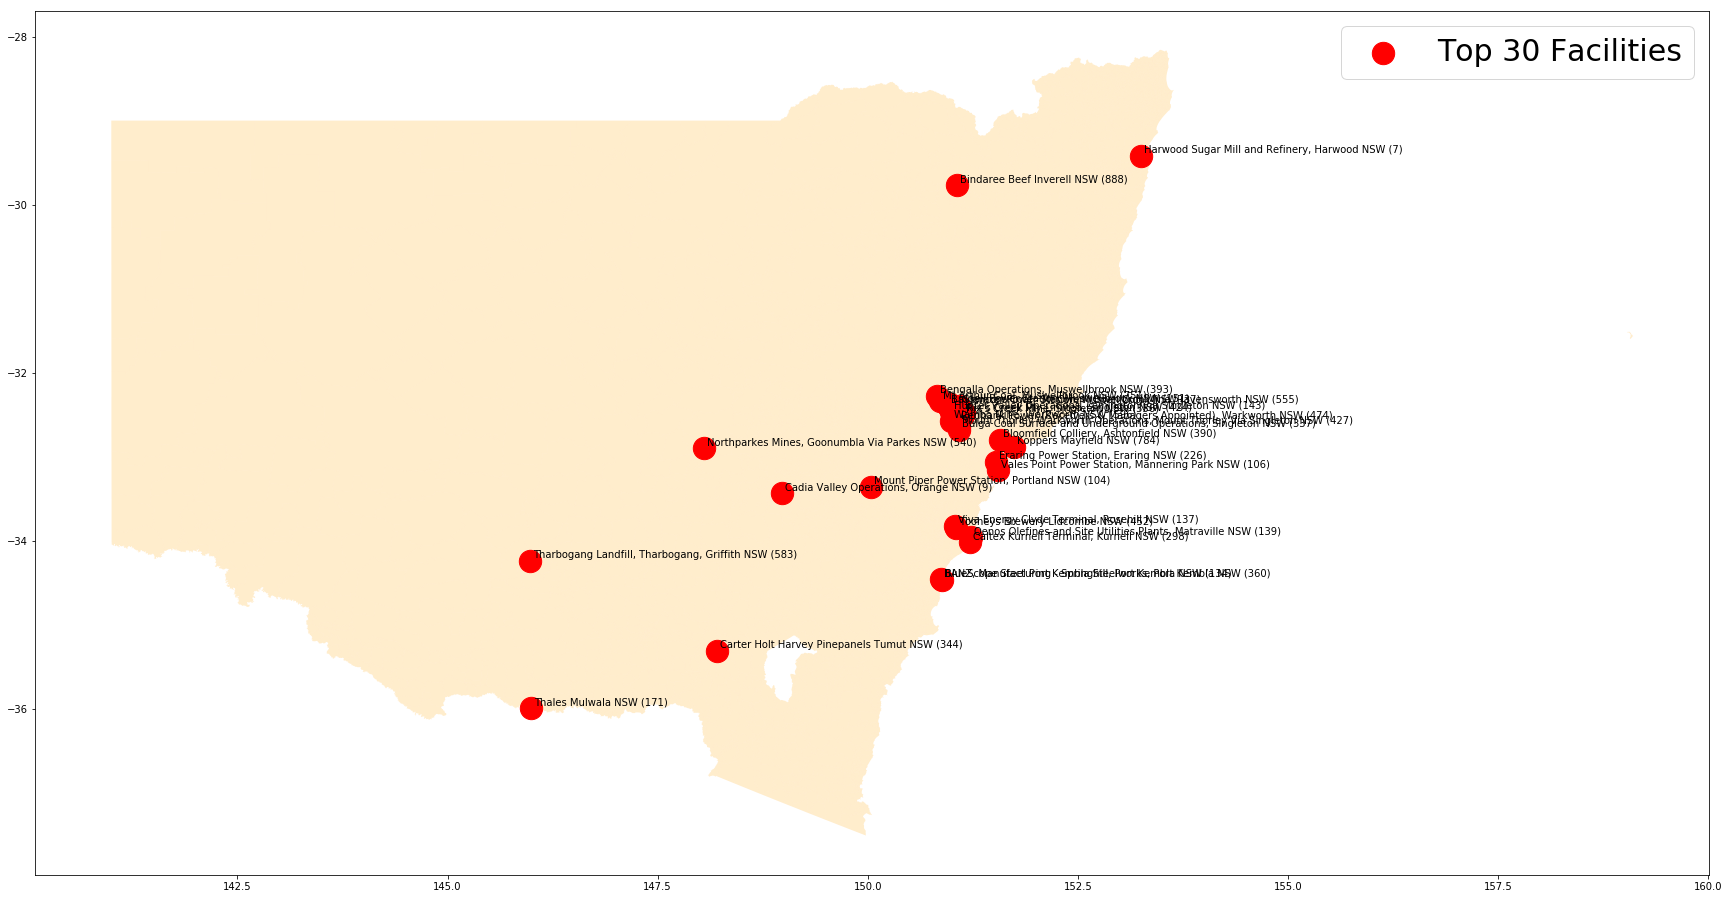

In [72]:
fig,ax = plt.subplots(figsize = (30,30))
burbs.plot(ax = ax, alpha = 0.2, color= "orange")
top_test.plot(ax = ax, markersize = 500, color = "red", marker = "o", label = "Top 30 Facilities")
# all_loc.plot(ax = ax, markersize = 30, color = "black", marker = "o", label = "All Facilities")
plt.legend(prop={'size': 30}, loc = 1)

geometry30 = [shapely.geometry.point.Point(xy) for xy in zip(loc_dict["long"], loc_dict["lat"])]

for x, y, label in zip(loc_dict["long"], loc_dict["lat"], loc_dict["facility"]):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")



In [73]:
right_here = shapely.geometry.point.Point(loc_dict["long"][0], loc_dict["lat"][0])
burbs["distance_from_facility"] = burbs.geometry.distance(right_here)


Text(0.5, 1.0, 'BlueScope Steel Port Kembla Steelworks, Port Kembla NSW (360)')

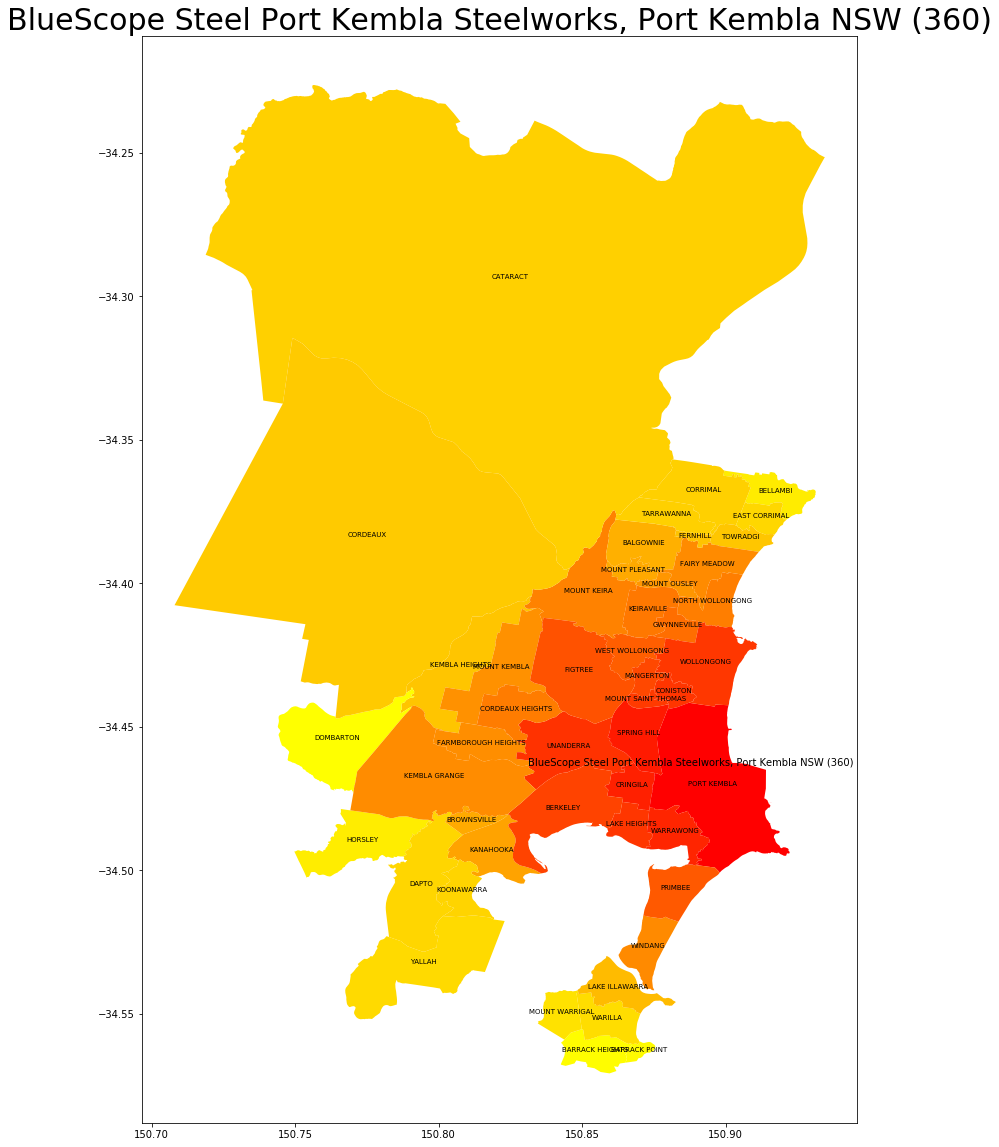

In [74]:
close_burbs = burbs[burbs.distance_from_facility<0.1]

tup = (loc_dict["long"][0], loc_dict["lat"][0])

fig,ax = plt.subplots(figsize = (20,20))

close_burbs.plot(ax = ax, column='distance_from_facility', cmap='autumn')

for idx, row in close_burbs.iterrows():
    plt.annotate(s=row.NSW_LOCA_2, 
                 xy=tuple(row.centroid.coords)[0],
                 horizontalalignment='center',
                 size = 7)

plt.annotate(s=str(loc_dict["facility"][0]), xy=tuple(tup),horizontalalignment='center', size = 10)



plt.title(str(loc_dict["facility"][0]), size = 30)



In [75]:
t05_f = tf[:5]

print(len(t05_f))

t05_name = []
t05_lats = []
t05_longs = []

for i in range(len(t05_f)):
    t05_name.append(t05_f.index[i])

for name in t05_name:
    t05_lats.append(get_lat(name))
    t05_longs.append(get_long(name))
    

for i in range(len(t05_name)):
    print(t05_name[i])
    print(t05_lats[i])
    print(t05_longs[i],'/n')
    

t05_loc_dict = {
    "facility" : [],
    "lat" : [],
    "long" : [],
}

for i in range(len(t05_name)):
    t05_loc_dict['facility'].append(t05_name[i])
    t05_loc_dict['lat'].append(t05_lats[i])
    t05_loc_dict['long'].append(t05_longs[i])

print(len(t05_name))
print(len(t05_loc_dict))

t05_loc_dict

5
BlueScope Steel Port Kembla Steelworks, Port Kembla NSW (360)
-34.463395
150.887662 /n
Qenos Olefines and Site Utilities Plants, Matraville NSW (139)
-33.957701
151.223104 /n
BANZ, Manufacturing - Springhill, Port Kembla NSW (134)
-34.458451
150.873417 /n
Tharbogang Landfill, Tharbogang, Griffith NSW (583)
-34.239808
145.980481 /n
Caltex Kurnell Terminal, Kurnell NSW (298)
-34.016405
151.214205 /n
5
3


{'facility': ['BlueScope Steel Port Kembla Steelworks, Port Kembla NSW (360)',
  'Qenos Olefines and Site Utilities Plants, Matraville NSW (139)',
  'BANZ, Manufacturing - Springhill, Port Kembla NSW (134)',
  'Tharbogang Landfill, Tharbogang, Griffith NSW (583)',
  'Caltex Kurnell Terminal, Kurnell NSW (298)'],
 'lat': [-34.463395, -33.957701, -34.458451, -34.239808, -34.016405],
 'long': [150.887662, 151.223104, 150.873417, 145.980481, 151.214205]}

# Top 5 Emitting Facilities + Closest Suburbs

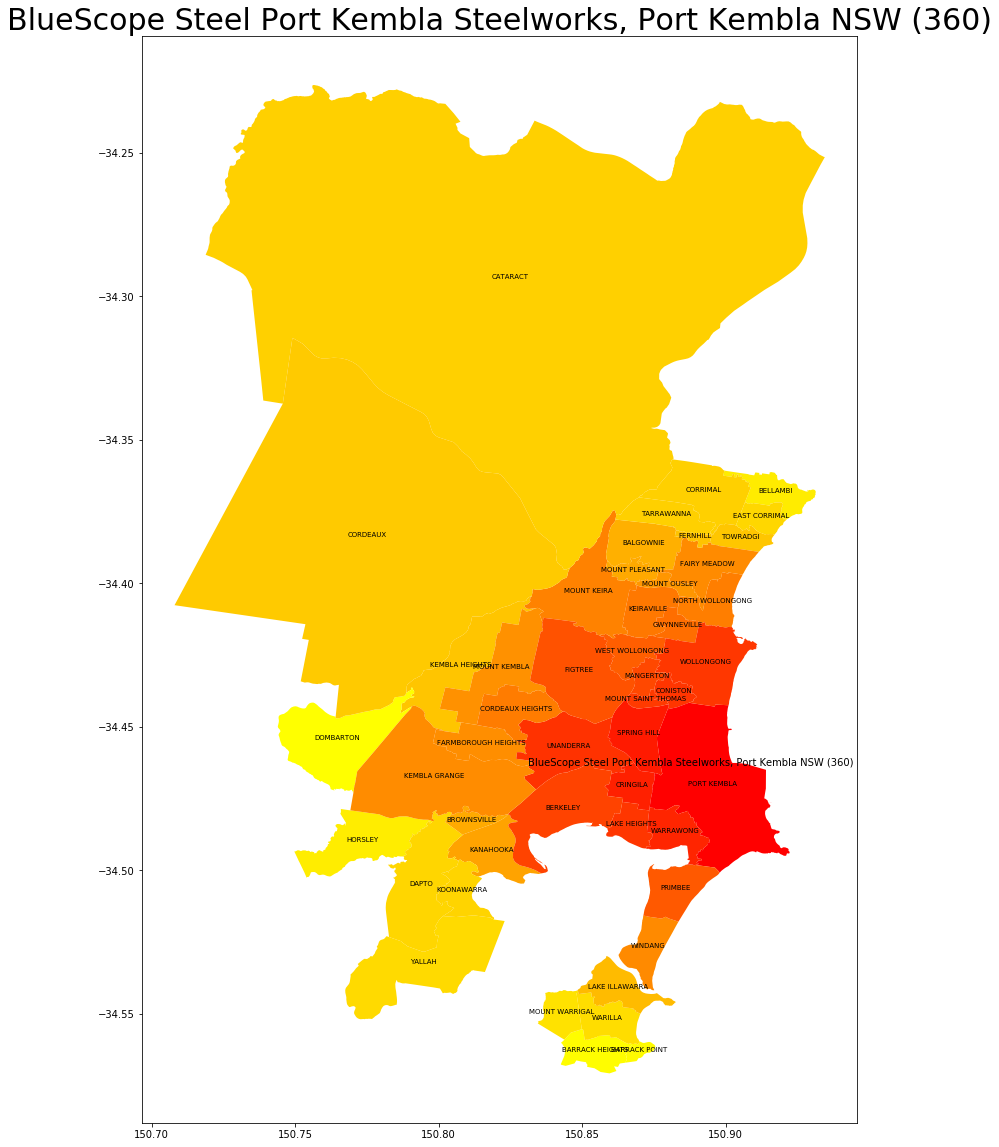

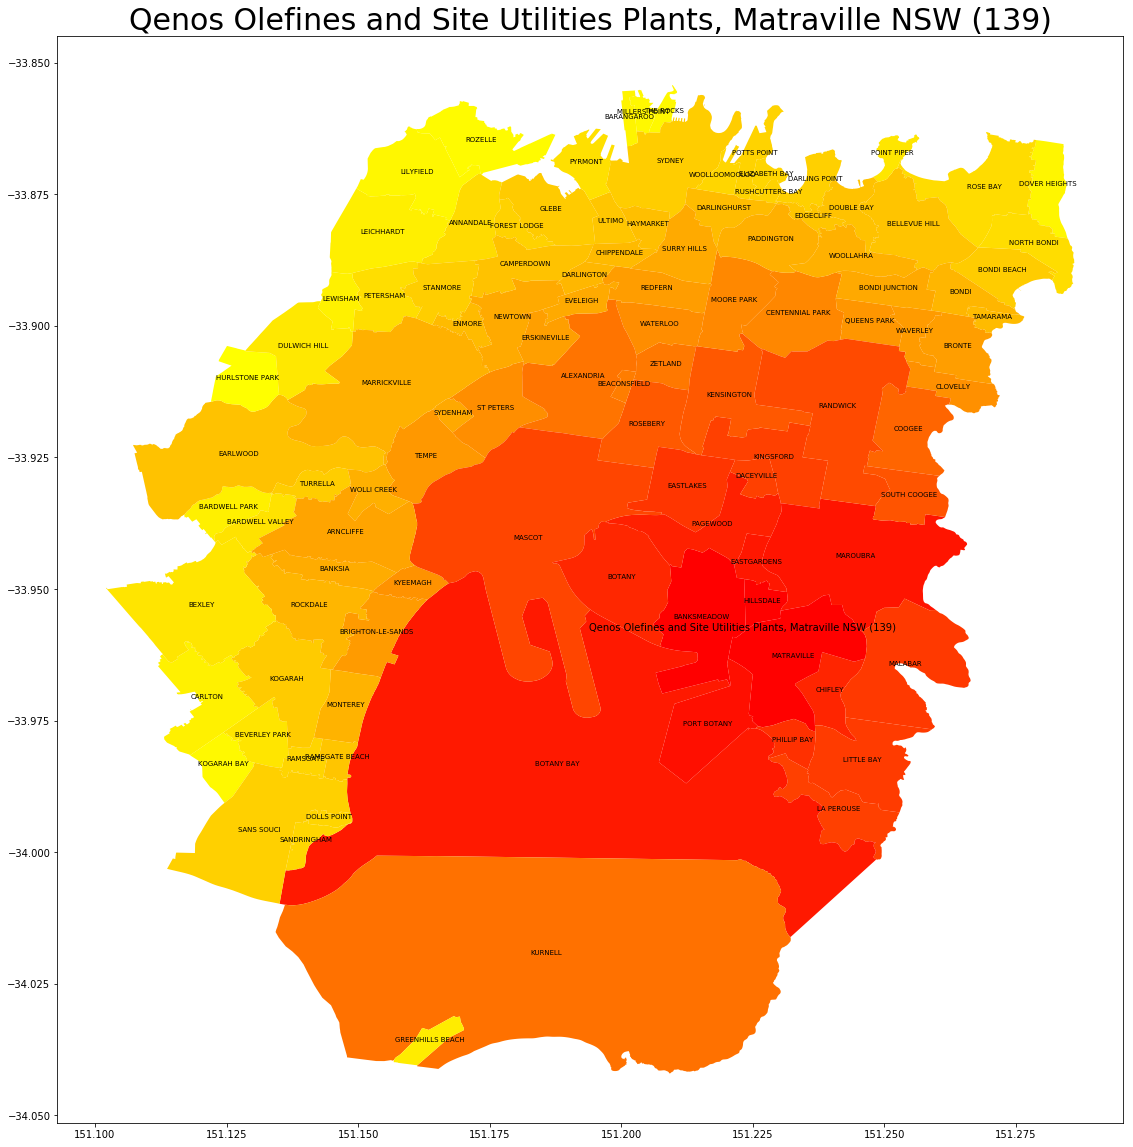

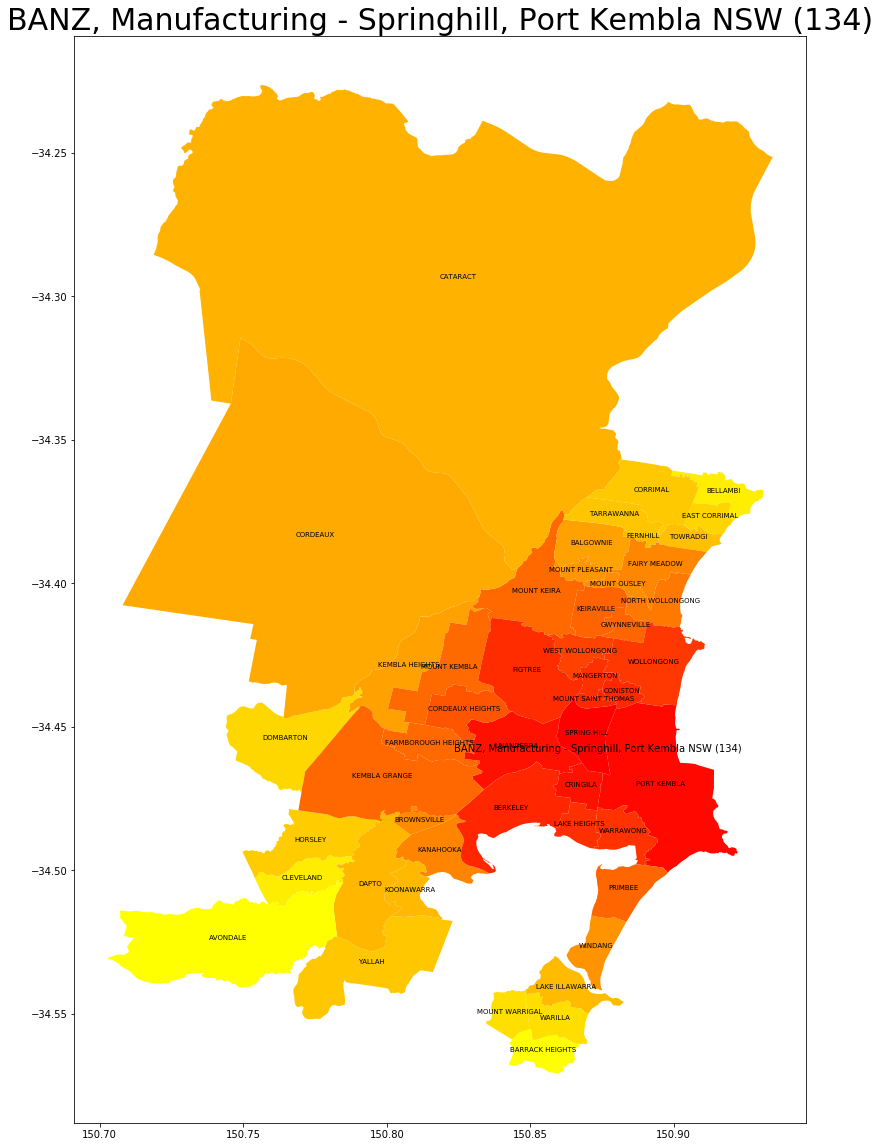

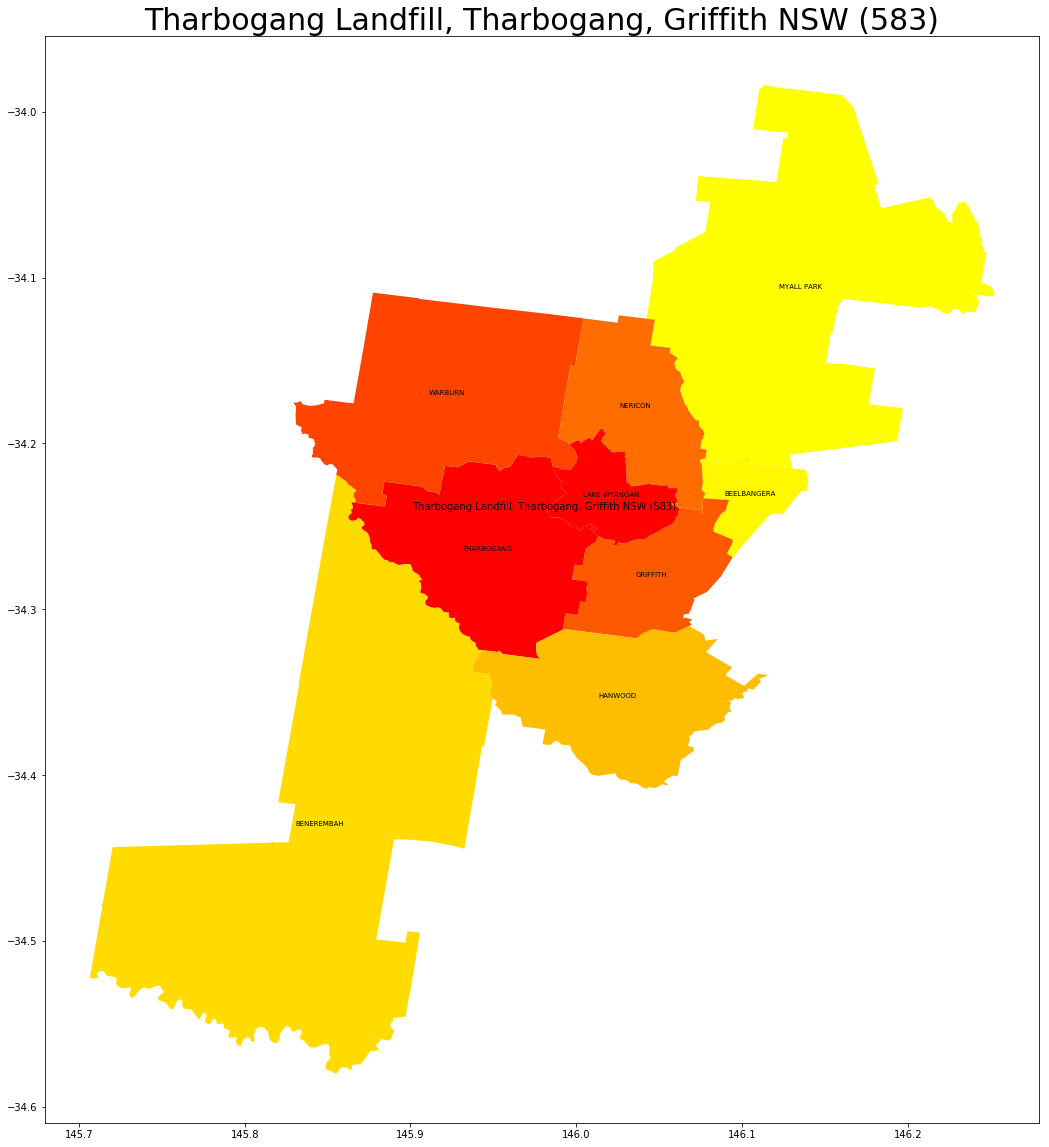

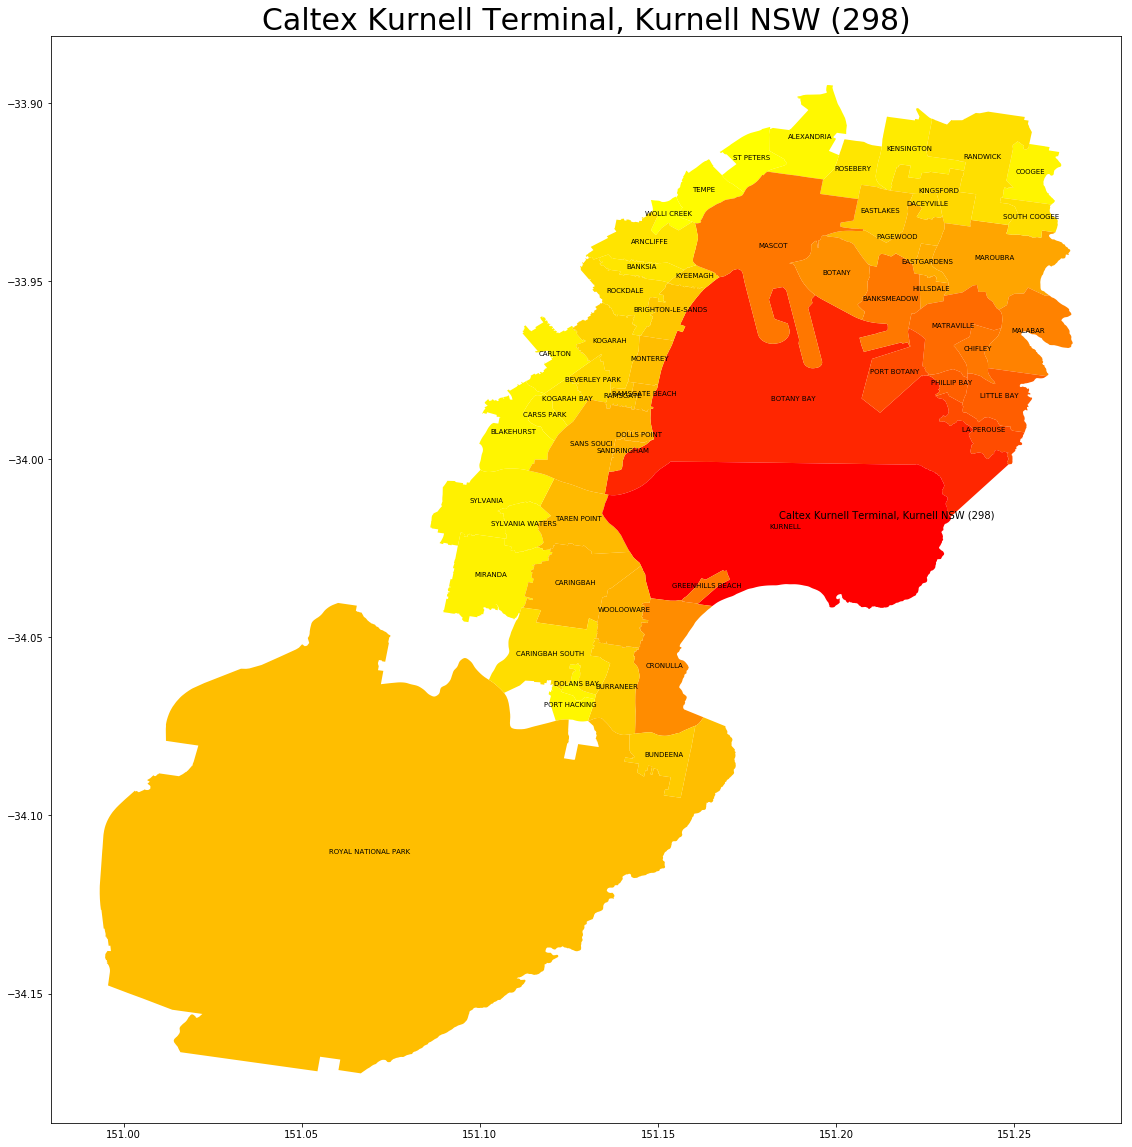

In [76]:
for i in range(len(t05_loc_dict['lat'])):
    
    right_here = shapely.geometry.point.Point(t05_loc_dict["long"][i], t05_loc_dict["lat"][i])
    burbs["distance_from_facility"] = burbs.geometry.distance(right_here)
    
    close_burbs = burbs[burbs.distance_from_facility<0.1]

    tup = (t05_loc_dict["long"][i], t05_loc_dict["lat"][i])

    fig,ax = plt.subplots(figsize = (20,20))

    close_burbs.plot(ax = ax, column='distance_from_facility', cmap='autumn')

    for idx, row in close_burbs.iterrows():
        plt.annotate(s=row.NSW_LOCA_2, 
                     xy=tuple(row.centroid.coords)[0],
                     horizontalalignment='center',
                     size = 7)

    plt.annotate(s=str(t05_loc_dict["facility"][i]), xy=tuple(tup),horizontalalignment='center', size = 10)

    plt.title(str(t05_loc_dict["facility"][i]), size = 30)
    

## Thank you 